Analyser.ipynb: 
Uses aggregator to summarise results of phases for quick and easy analysis.

Change "workspace_path" to the location of your workspace, "data_path" to the directory containing the phases you want to analyse and filter results with the "agg.filter" method.

In [1]:
from autoconf import conf

workspace_path = "/home/matthew/Durham2020/AutoLensWorkspace/autolens_workspace/"
conf.instance = conf.Config(config_path=f"{workspace_path}config",)

In [2]:
import autolens as al
import autofit as af
import autolens.plot as aplt
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_path = "/home/matthew/Durham2020/MyScripts/autolens_tools/ExampleData/"
agg = af.Aggregator(directory=data_path)

phase_name = "phase_2"
agg_filter_phase = agg.filter(agg.phase == phase_name)


Phases were found in these directories:

/home/matthew/Durham2020/MyScripts/autolens_tools/ExampleData/NFW_sersic_exp/(0.111, 0.0)_(0.0, 0.333)_12.0_1.1_2.0_(0.1, 0.1)_(0.0, 0.0)_0.2/phase_1/settings__grid_sub_2/dynesty_static__nlive_50__bound_multi_vol_dec_0.5_vol_check_2.0__enlarge_1.0__sample_rwalk_walks_5_facc_0.2
/home/matthew/Durham2020/MyScripts/autolens_tools/ExampleData/NFW_sersic_exp/(0.111, 0.0)_(0.0, 0.333)_12.0_1.1_2.0_(0.1, 0.1)_(0.0, 0.0)_0.2/phase_2/settings__grid_sub_2/dynesty_static__nlive_50__bound_multi_vol_dec_0.5_vol_check_2.0__enlarge_1.0__sample_rwalk_walks_5_facc_0.2
/home/matthew/Durham2020/MyScripts/autolens_tools/ExampleData/NFW_sersic_exp/(0.111, 0.0)_(-0.333, 0.0)_12.0_1.1_0.9_(0.1, 0.1)_(0.0, 0.0)_0.2/phase_1/settings__grid_sub_2/dynesty_static__nlive_50__bound_multi_vol_dec_0.5_vol_check_2.0__enlarge_1.0__sample_rwalk_walks_5_facc_0.2
/home/matthew/Durham2020/MyScripts/autolens_tools/ExampleData/NFW_sersic_exp/(0.111, 0.0)_(-0.333, 0.0)_12.0_1.1_0.9_(0.

In [4]:
def radial_mass_graph(galaxy_dict):

    n_directions = 20
    r_array = np.arange(0.0, 5, 0.01)
    e_radius_list = []
    fig, axs = plt.subplots(1, len(galaxy_dict) + 1, figsize=(25, 8))
    axs_index = 0
    warning_bool = False

    def trip_warning(profile):
        return profile.centre[0] ** 2 + profile.centre[1] ** 2 > 0.0 ** 2

    for galaxy_key in galaxy_dict:
        galaxy = galaxy_dict[galaxy_key]
        e_radius = galaxy.einstein_radius_in_units()
        e_radius_list.append(e_radius)
        conv_array = np.zeros(r_array.shape)
        total_conv_array = np.zeros(r_array.shape)
        angle_array = np.array(
            [
                np.sin(np.arange(0, 2 * np.pi, 2 * np.pi / n_directions)),
                np.cos(np.arange(0, 2 * np.pi, 2 * np.pi / n_directions)),
            ]
        ).transpose()
        N_profiles = 0
        for key in galaxy.__dict__:
            if isinstance(galaxy.__dict__[key], al.mp.MassProfile):
                profile = galaxy.__dict__[key]
                label = key
                N_profiles += 1
                if trip_warning(profile):
                    warning_bool = True
                for i in range(r_array.size):
                    grid = r_array[i] * angle_array
                    conv_array[i] = float(
                        np.average(profile.convergence_from_grid(grid=grid))
                    )
                axs[axs_index].plot(r_array, conv_array, label=label)
                total_conv_array += conv_array
        if N_profiles > 1:
            axs[axs_index].plot(r_array, total_conv_array, label="Total")
        axs[axs_index].legend()
        axs[axs_index].autoscale(tight=True)
        axs[axs_index].set_yscale("log")
        axs[axs_index].plot(
            [e_radius, e_radius],
            axs[axs_index].get_ylim(),
            axs[axs_index].lines[-1].get_color(),
            linestyle="dashed",
        )
        axs[axs_index].set_xlabel("Distance from centre /arcseconds")
        axs[axs_index].set_ylabel("Average Convergence")
        axs[axs_index].set_title(galaxy_key)
        axs[-1].plot(r_array, total_conv_array, label=galaxy_key)
        axs_index += 1

    axs[-1].set_xlabel("Distance from centre /arcseconds")
    axs[-1].set_ylabel("Average Convergence")
    axs[-1].set_title("Totals")
    axs[-1].legend()
    axs[-1].autoscale(tight=True)
    axs[-1].set_yscale("log")
    for index in range(len(e_radius_list)):
        e_radius = e_radius_list[index]
        axs[-1].plot(
            [e_radius, e_radius],
            axs[-1].get_ylim(),
            axs[-1].lines[index].get_color(),
            linestyle="dashed",
        )
    plt.show()
    if warning_bool:
        print("WARNING: OFF-CENTRE MASS PROFILES")


Phase:

Dataset name: (0.111, 0.0)_(0.0, 0.333)_12.0_1.1_2.0_(0.1, 0.1)_(0.0, 0.0)_0.2

Phase directory:
/home/matthew/Durham2020/MyScripts/autolens_tools/ExampleData/NFW_sersic_exp/(0.111, 0.0)_(0.0, 0.333)_12.0_1.1_2.0_(0.1, 0.1)_(0.0, 0.0)_0.2/phase_1/settings__grid_sub_2/dynesty_static__nlive_50__bound_multi_vol_dec_0.5_vol_check_2.0__enlarge_1.0__sample_rwalk_walks_5_facc_0.2

Info:
{'dataset_name': '(0.111, 0.0)_(0.0, 0.333)_12.0_1.1_2.0_(0.1, 0.1)_(0.0, 0.0)_0.2', 'pixel_scales': (0.05, 0.05)}


True Galaxies:

Redshift: 0.5
Mass Profiles:
EllipticalSersic
centre: (0.0, 0.0)
elliptical_comps: (0.111, 0.0)
axis_ratio: 0.8001800180018002
phi: 45.0
mass_to_light_ratio: 1.0
intensity: 0.46829403142395487
effective_radius: 0.6
sersic_index: 4.0
EllipticalExponential
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.333)
axis_ratio: 0.5003750937734434
phi: 0.0
mass_to_light_ratio: 1.0
intensity: 0.1095426317288167
effective_radius: 1.2
sersic_index: 1.0
SphericalTruncatedNFWMCRLudlow
mass

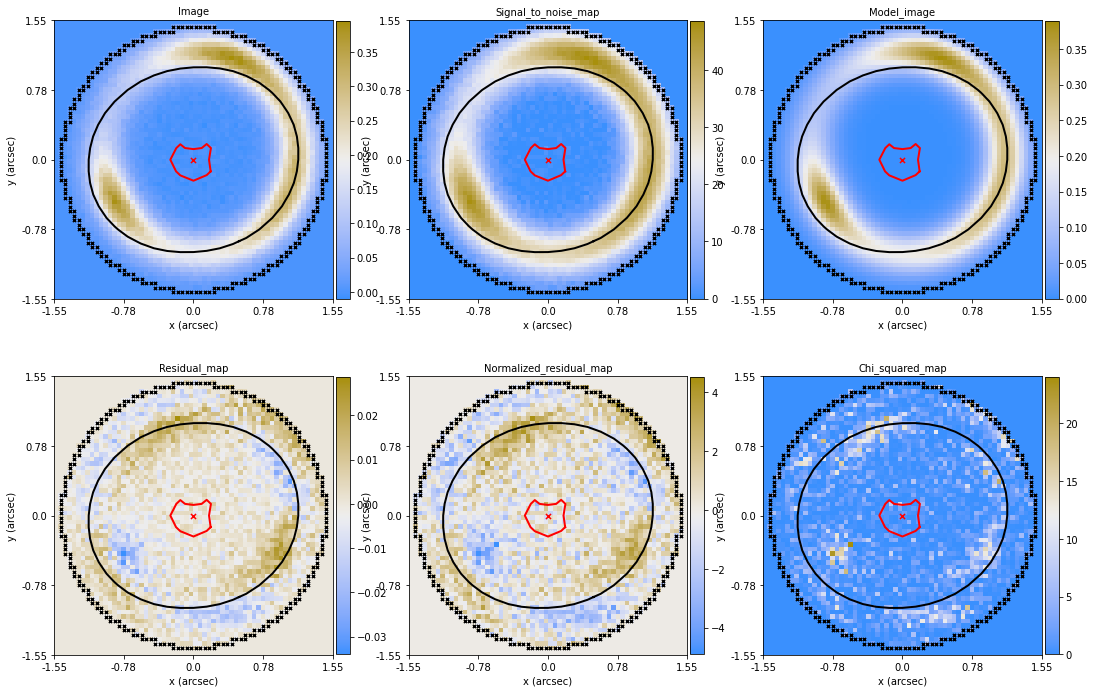


Radial Mass Distributions: (Dashed lines correspond to Einstein radii of each galaxy)



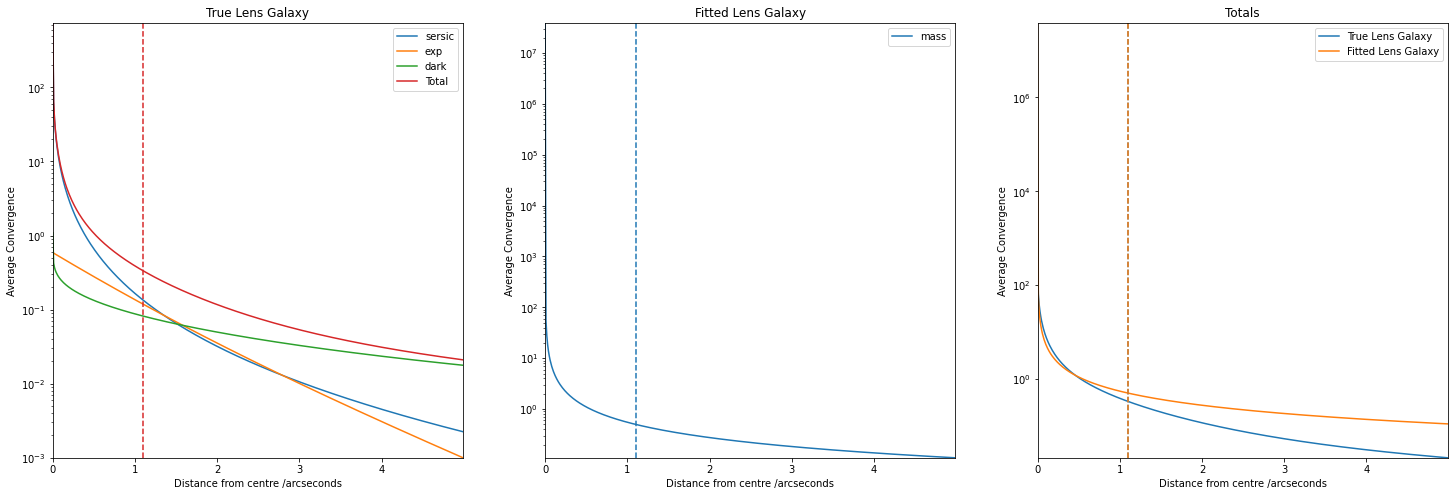


True Source Plane:



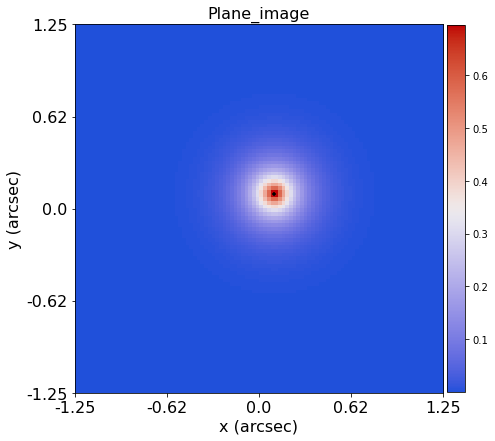


Fitted Source Plane:



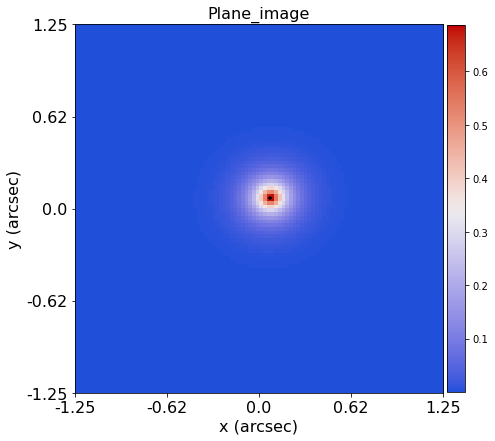


Phase:

Dataset name: (0.111, 0.0)_(0.0, 0.333)_12.0_1.1_2.0_(0.1, 0.1)_(0.0, 0.0)_0.2

Phase directory:
/home/matthew/Durham2020/MyScripts/autolens_tools/ExampleData/NFW_sersic_exp/(0.111, 0.0)_(0.0, 0.333)_12.0_1.1_2.0_(0.1, 0.1)_(0.0, 0.0)_0.2/phase_2/settings__grid_sub_2/dynesty_static__nlive_50__bound_multi_vol_dec_0.5_vol_check_2.0__enlarge_1.0__sample_rwalk_walks_5_facc_0.2

Info:
{'dataset_name': '(0.111, 0.0)_(0.0, 0.333)_12.0_1.1_2.0_(0.1, 0.1)_(0.0, 0.0)_0.2', 'pixel_scales': (0.05, 0.05)}


True Galaxies:

Redshift: 0.5
Mass Profiles:
EllipticalSersic
centre: (0.0, 0.0)
elliptical_comps: (0.111, 0.0)
axis_ratio: 0.8001800180018002
phi: 45.0
mass_to_light_ratio: 1.0
intensity: 0.46829403142395487
effective_radius: 0.6
sersic_index: 4.0
EllipticalExponential
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.333)
axis_ratio: 0.5003750937734434
phi: 0.0
mass_to_light_ratio: 1.0
intensity: 0.1095426317288167
effective_radius: 1.2
sersic_index: 1.0
SphericalTruncatedNFWMCRLudlow
mass

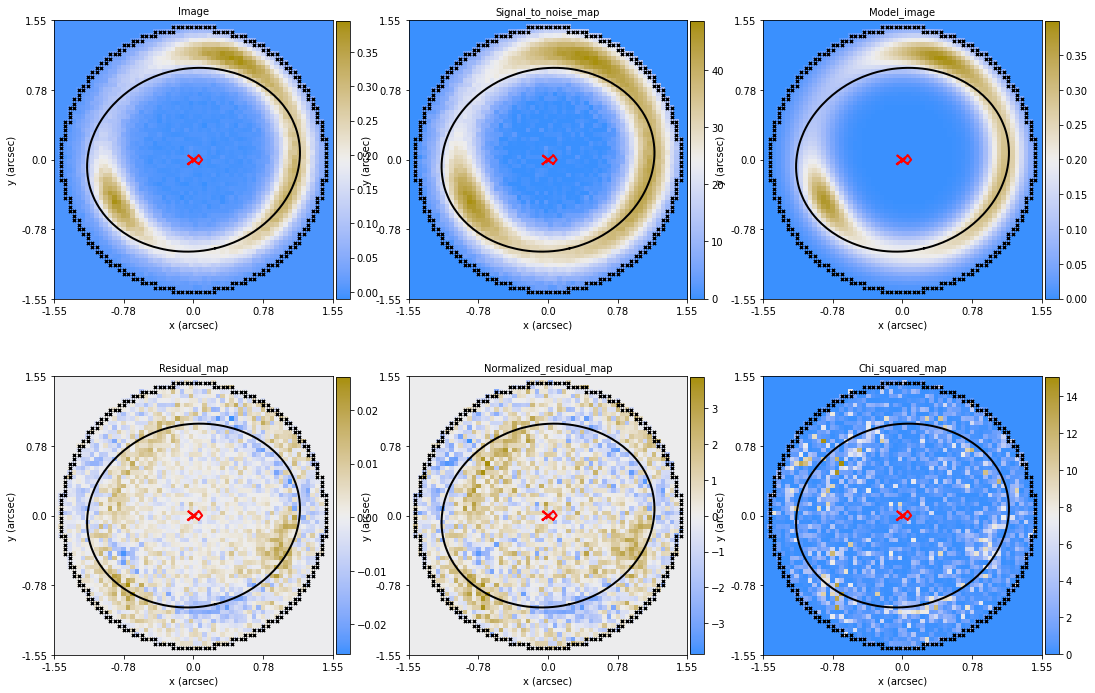


Radial Mass Distributions: (Dashed lines correspond to Einstein radii of each galaxy)



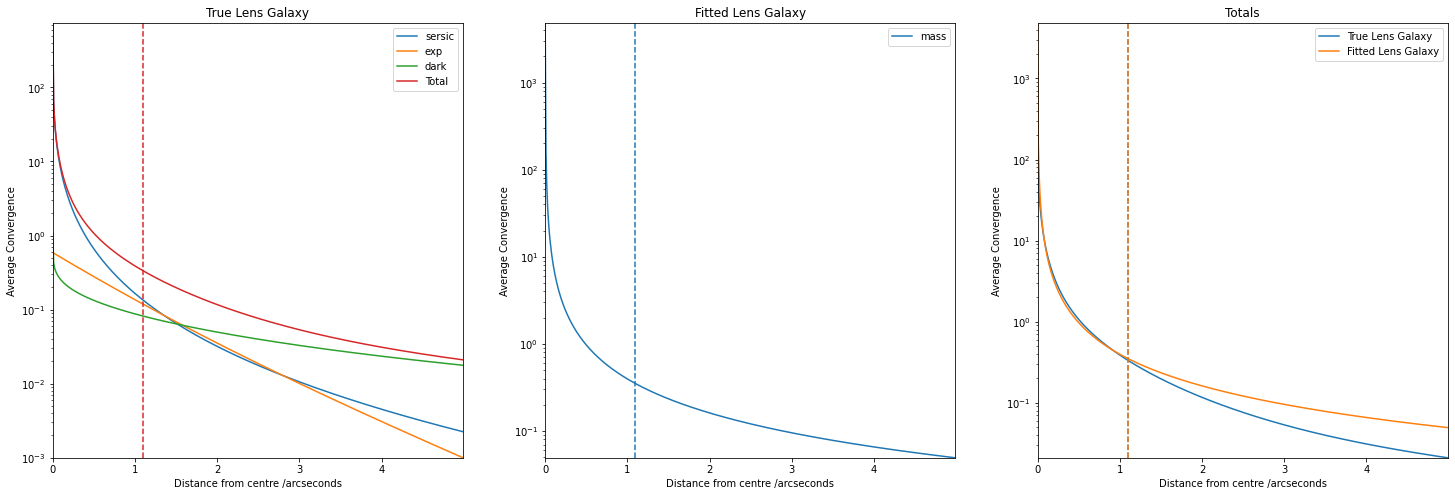


True Source Plane:



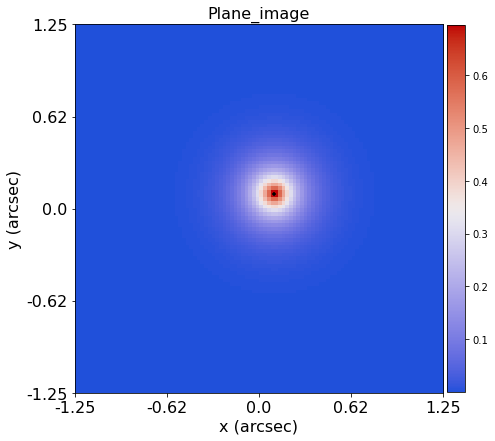


Fitted Source Plane:



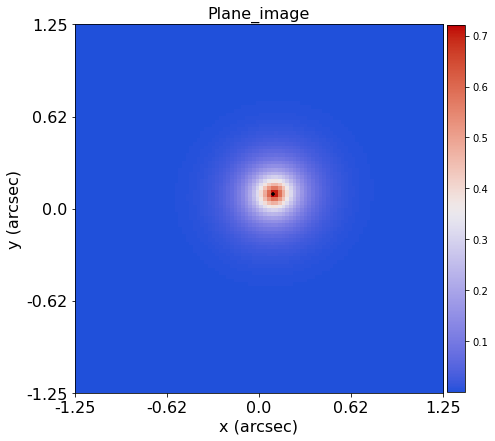


Phase:

Dataset name: (0.111, 0.0)_(-0.333, 0.0)_12.0_1.1_0.9_(0.1, 0.1)_(0.0, 0.0)_0.2

Phase directory:
/home/matthew/Durham2020/MyScripts/autolens_tools/ExampleData/NFW_sersic_exp/(0.111, 0.0)_(-0.333, 0.0)_12.0_1.1_0.9_(0.1, 0.1)_(0.0, 0.0)_0.2/phase_1/settings__grid_sub_2/dynesty_static__nlive_50__bound_multi_vol_dec_0.5_vol_check_2.0__enlarge_1.0__sample_rwalk_walks_5_facc_0.2

Info:
{'dataset_name': '(0.111, 0.0)_(-0.333, 0.0)_12.0_1.1_0.9_(0.1, 0.1)_(0.0, 0.0)_0.2', 'pixel_scales': (0.05, 0.05)}


True Galaxies:

Redshift: 0.5
Mass Profiles:
EllipticalSersic
centre: (0.0, 0.0)
elliptical_comps: (0.111, 0.0)
axis_ratio: 0.8001800180018002
phi: 45.0
mass_to_light_ratio: 1.0
intensity: 0.3594889088917368
effective_radius: 0.6
sersic_index: 4.0
EllipticalExponential
centre: (0.0, 0.0)
elliptical_comps: (-0.333, 0.0)
axis_ratio: 0.5003750937734434
phi: -45.0
mass_to_light_ratio: 1.0
intensity: 0.18686970303215772
effective_radius: 1.2
sersic_index: 1.0
SphericalTruncatedNFWMCRLudlo

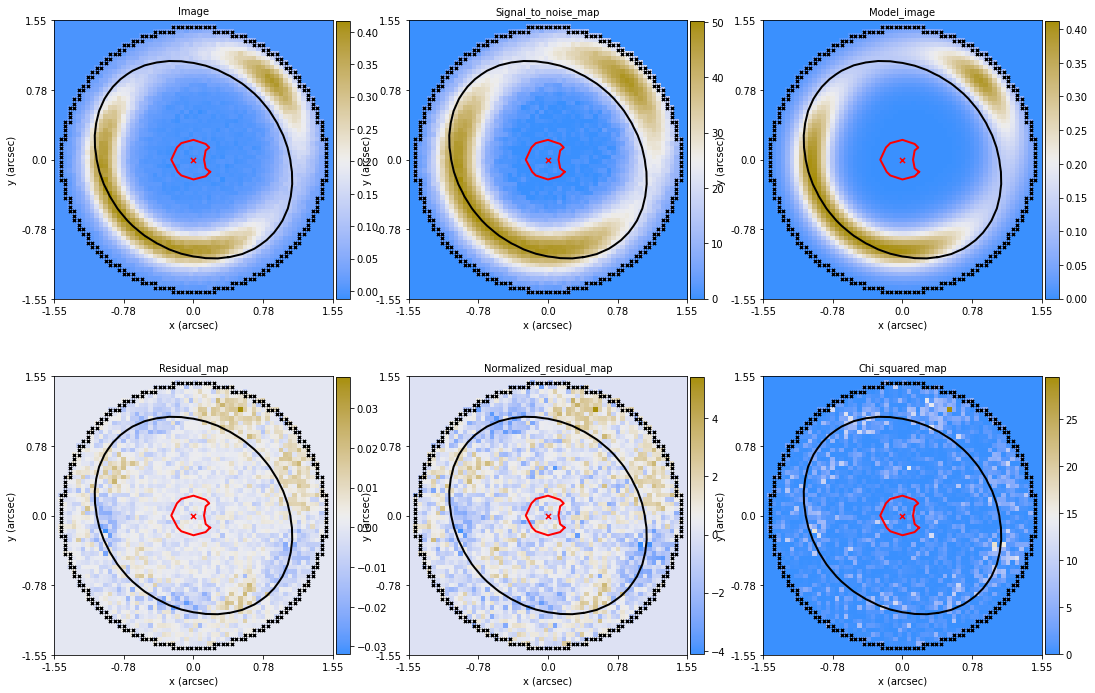


Radial Mass Distributions: (Dashed lines correspond to Einstein radii of each galaxy)



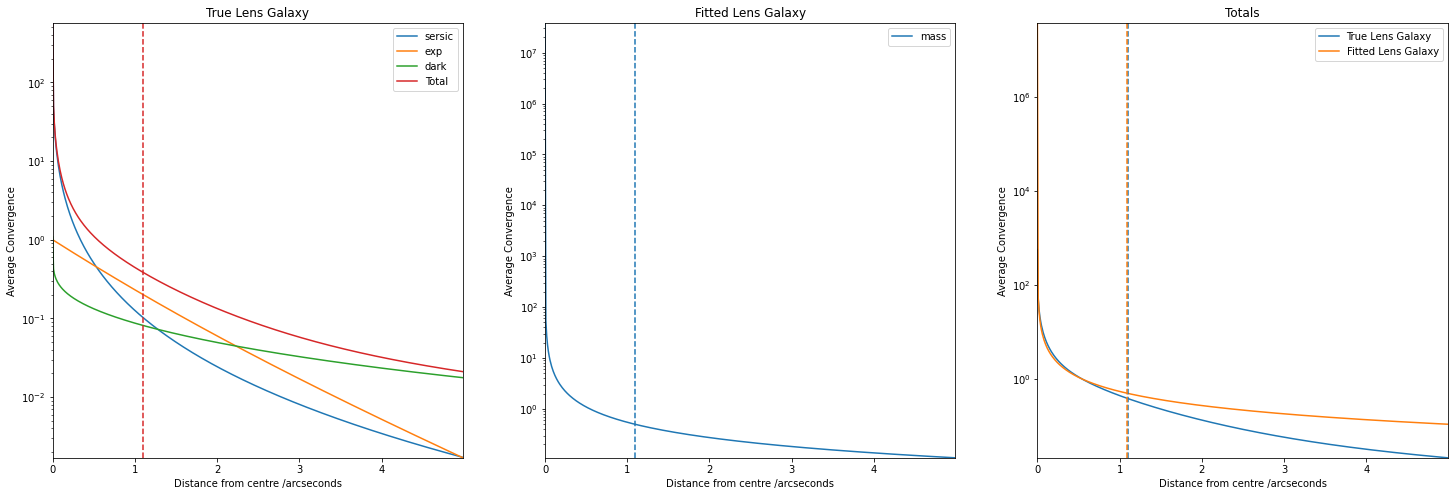


True Source Plane:



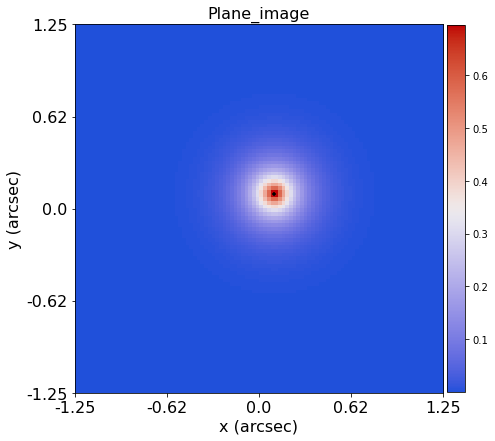


Fitted Source Plane:



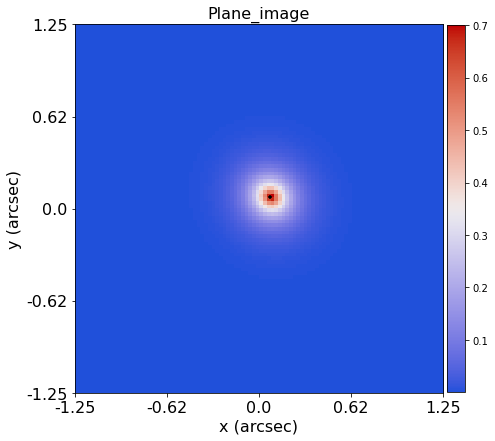


Phase:

Dataset name: (0.111, 0.0)_(-0.333, 0.0)_12.0_1.1_0.9_(0.1, 0.1)_(0.0, 0.0)_0.2

Phase directory:
/home/matthew/Durham2020/MyScripts/autolens_tools/ExampleData/NFW_sersic_exp/(0.111, 0.0)_(-0.333, 0.0)_12.0_1.1_0.9_(0.1, 0.1)_(0.0, 0.0)_0.2/phase_2/settings__grid_sub_2/dynesty_static__nlive_50__bound_multi_vol_dec_0.5_vol_check_2.0__enlarge_1.0__sample_rwalk_walks_5_facc_0.2

Info:
{'dataset_name': '(0.111, 0.0)_(-0.333, 0.0)_12.0_1.1_0.9_(0.1, 0.1)_(0.0, 0.0)_0.2', 'pixel_scales': (0.05, 0.05)}


True Galaxies:

Redshift: 0.5
Mass Profiles:
EllipticalSersic
centre: (0.0, 0.0)
elliptical_comps: (0.111, 0.0)
axis_ratio: 0.8001800180018002
phi: 45.0
mass_to_light_ratio: 1.0
intensity: 0.3594889088917368
effective_radius: 0.6
sersic_index: 4.0
EllipticalExponential
centre: (0.0, 0.0)
elliptical_comps: (-0.333, 0.0)
axis_ratio: 0.5003750937734434
phi: -45.0
mass_to_light_ratio: 1.0
intensity: 0.18686970303215772
effective_radius: 1.2
sersic_index: 1.0
SphericalTruncatedNFWMCRLudlo

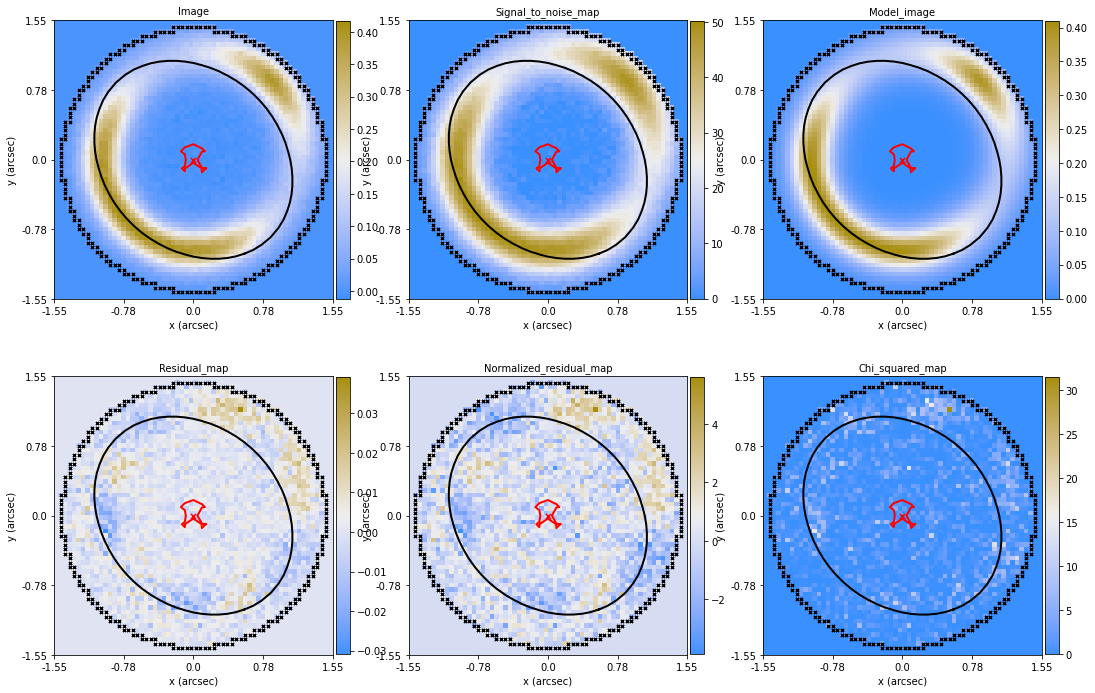


Radial Mass Distributions: (Dashed lines correspond to Einstein radii of each galaxy)



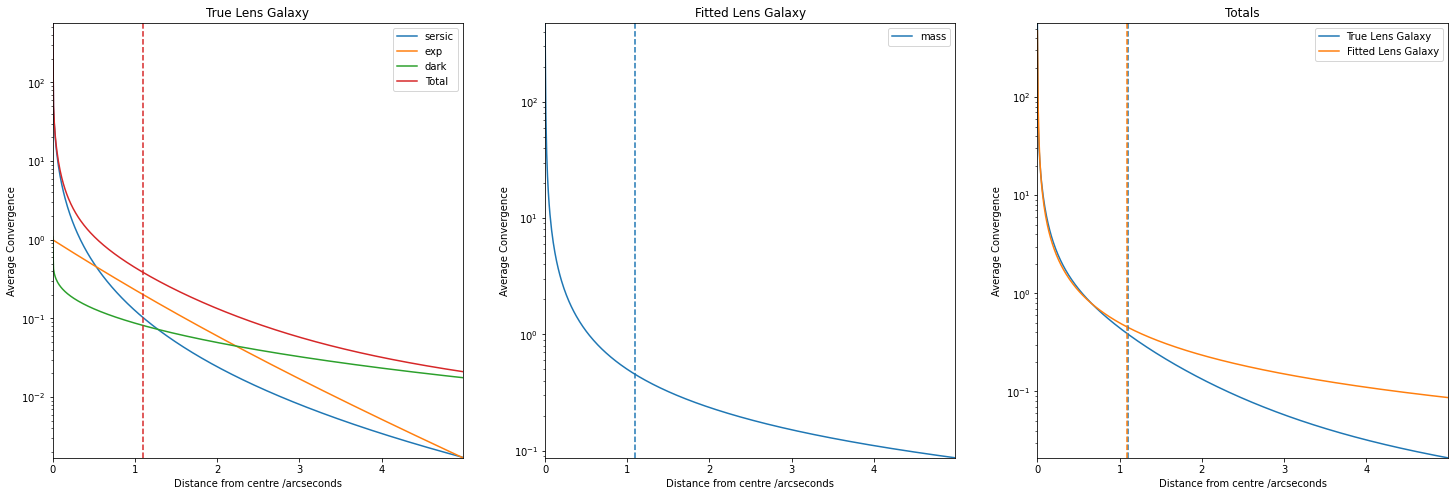


True Source Plane:



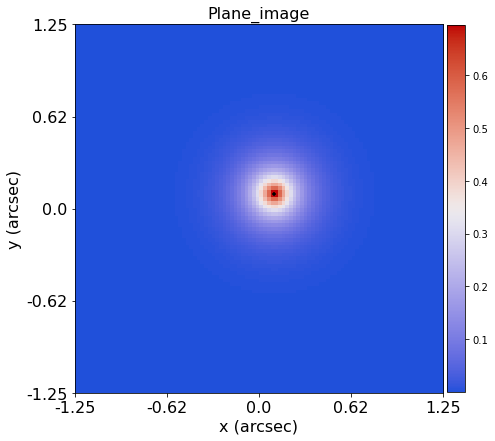


Fitted Source Plane:



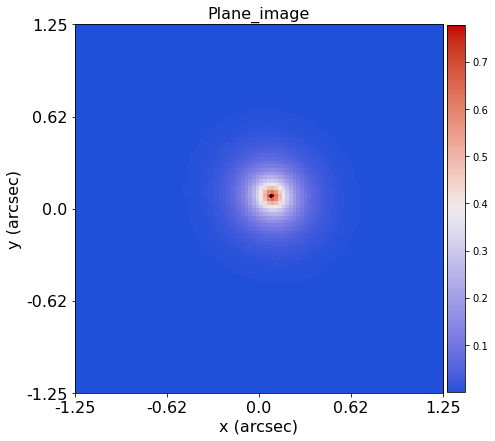


Phase:

Dataset name: (0.111, 0.0)_(-0.333, 0.0)_13.0_1.1_0.5_(0.1, 0.1)_(0.0, 0.0)_0.2

Phase directory:
/home/matthew/Durham2020/MyScripts/autolens_tools/ExampleData/NFW_sersic_exp/(0.111, 0.0)_(-0.333, 0.0)_13.0_1.1_0.5_(0.1, 0.1)_(0.0, 0.0)_0.2/phase_1/settings__grid_sub_2/dynesty_static__nlive_50__bound_multi_vol_dec_0.5_vol_check_2.0__enlarge_1.0__sample_rwalk_walks_5_facc_0.2

Info:
{'dataset_name': '(0.111, 0.0)_(-0.333, 0.0)_13.0_1.1_0.5_(0.1, 0.1)_(0.0, 0.0)_0.2', 'pixel_scales': (0.05, 0.05)}


True Galaxies:

Redshift: 0.5
Mass Profiles:
EllipticalSersic
centre: (0.0, 0.0)
elliptical_comps: (0.111, 0.0)
axis_ratio: 0.8001800180018002
phi: 45.0
mass_to_light_ratio: 1.0
intensity: 0.2142770416339714
effective_radius: 0.6
sersic_index: 4.0
EllipticalExponential
centre: (0.0, 0.0)
elliptical_comps: (-0.333, 0.0)
axis_ratio: 0.5003750937734434
phi: -45.0
mass_to_light_ratio: 1.0
intensity: 0.200494666445822
effective_radius: 1.2
sersic_index: 1.0
SphericalTruncatedNFWMCRLudlow


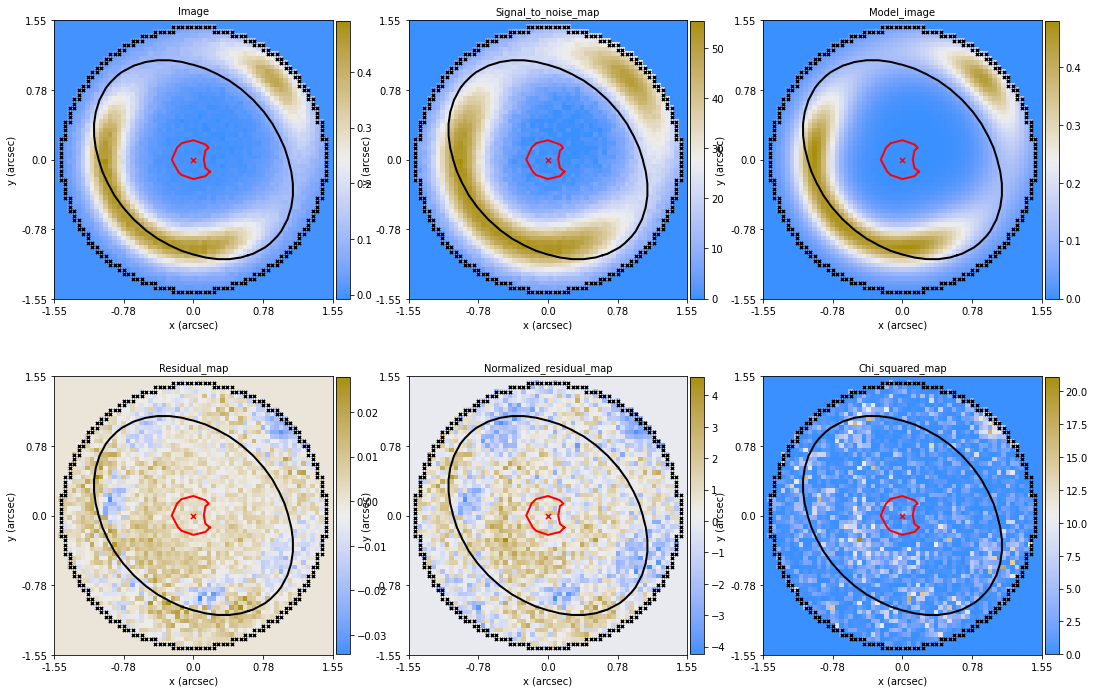


Radial Mass Distributions: (Dashed lines correspond to Einstein radii of each galaxy)



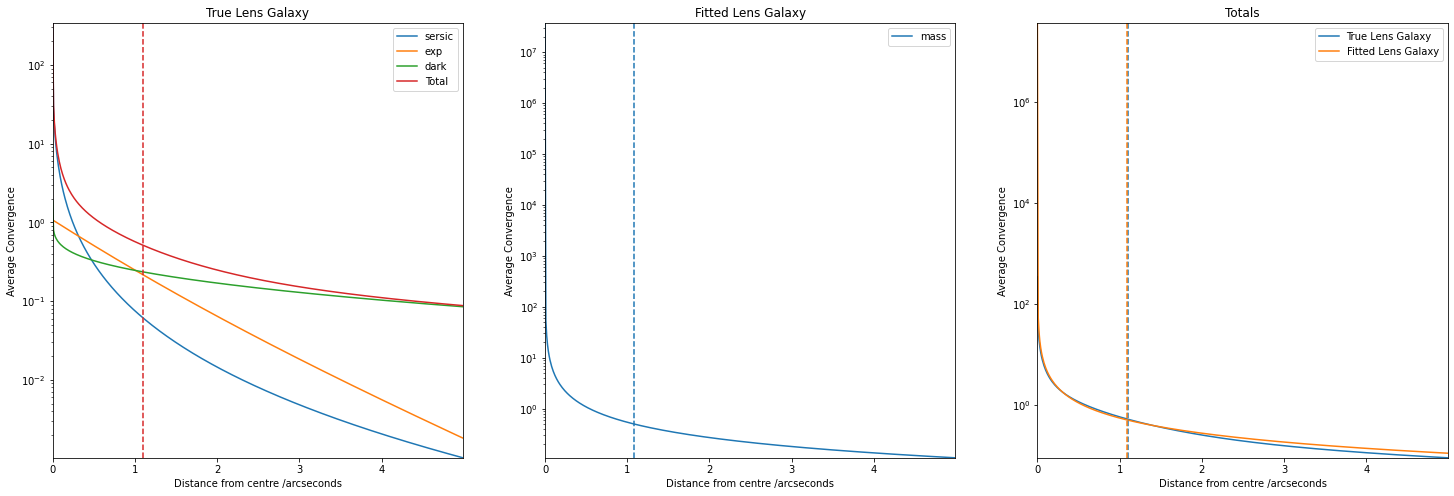


True Source Plane:



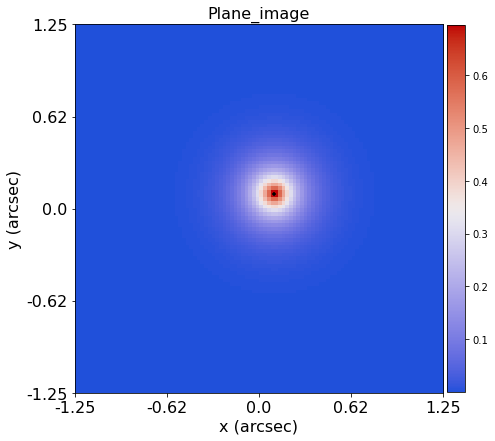


Fitted Source Plane:



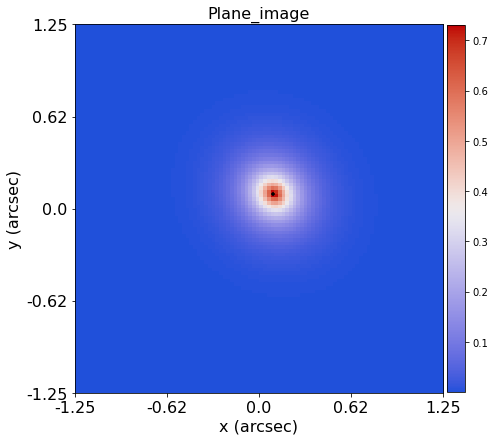


Phase:

Dataset name: (0.111, 0.0)_(-0.333, 0.0)_13.0_1.1_0.5_(0.1, 0.1)_(0.0, 0.0)_0.2

Phase directory:
/home/matthew/Durham2020/MyScripts/autolens_tools/ExampleData/NFW_sersic_exp/(0.111, 0.0)_(-0.333, 0.0)_13.0_1.1_0.5_(0.1, 0.1)_(0.0, 0.0)_0.2/phase_2/settings__grid_sub_2/dynesty_static__nlive_50__bound_multi_vol_dec_0.5_vol_check_2.0__enlarge_1.0__sample_rwalk_walks_5_facc_0.2

Info:
{'dataset_name': '(0.111, 0.0)_(-0.333, 0.0)_13.0_1.1_0.5_(0.1, 0.1)_(0.0, 0.0)_0.2', 'pixel_scales': (0.05, 0.05)}


True Galaxies:

Redshift: 0.5
Mass Profiles:
EllipticalSersic
centre: (0.0, 0.0)
elliptical_comps: (0.111, 0.0)
axis_ratio: 0.8001800180018002
phi: 45.0
mass_to_light_ratio: 1.0
intensity: 0.2142770416339714
effective_radius: 0.6
sersic_index: 4.0
EllipticalExponential
centre: (0.0, 0.0)
elliptical_comps: (-0.333, 0.0)
axis_ratio: 0.5003750937734434
phi: -45.0
mass_to_light_ratio: 1.0
intensity: 0.200494666445822
effective_radius: 1.2
sersic_index: 1.0
SphericalTruncatedNFWMCRLudlow


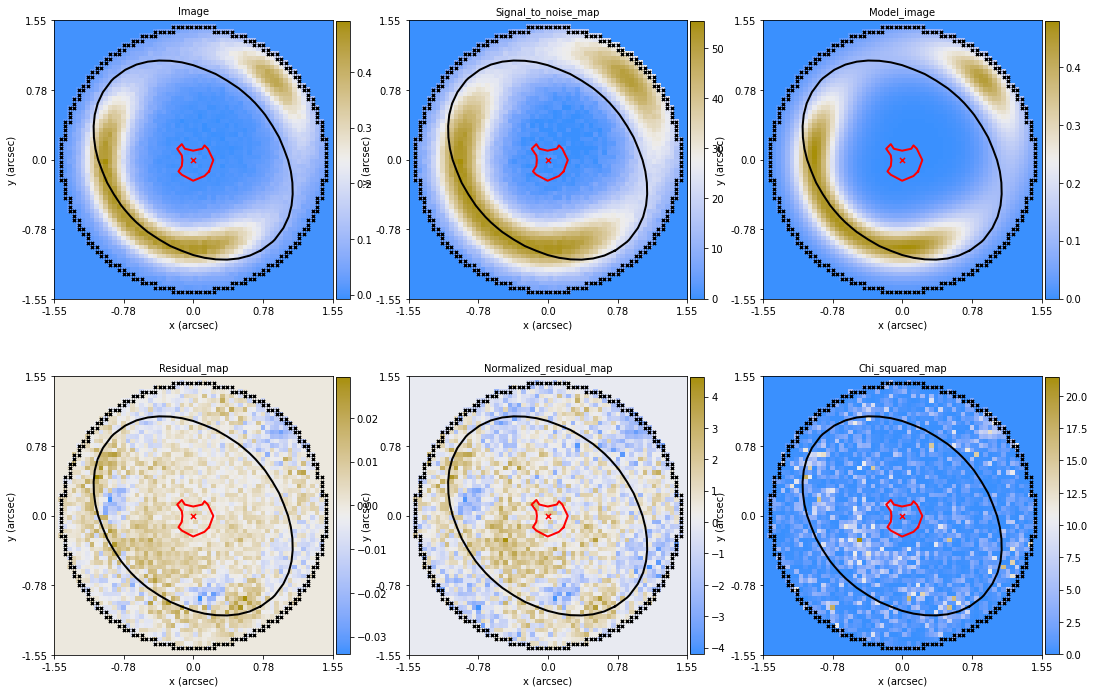


Radial Mass Distributions: (Dashed lines correspond to Einstein radii of each galaxy)



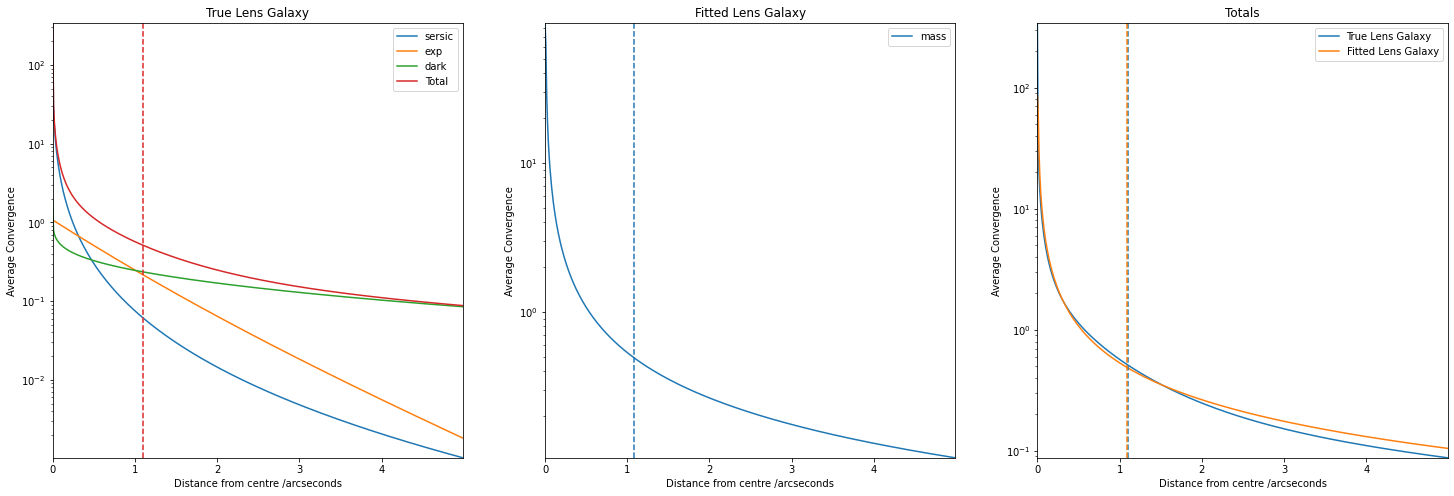


True Source Plane:



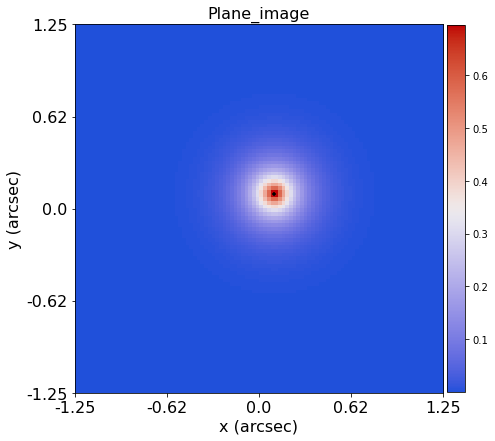


Fitted Source Plane:



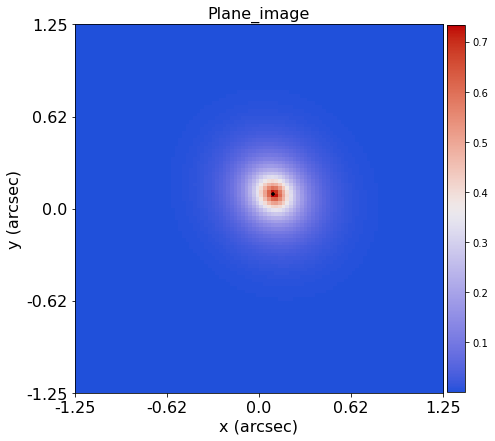


Phase:

Dataset name: (0.333, 0.0)_12.0_1.0_(0.1, 0.1)_(0.0, 0.0)_0.2

Phase directory:
/home/matthew/Durham2020/MyScripts/autolens_tools/ExampleData/NFW_sersic/(0.333, 0.0)_12.0_1.0_(0.1, 0.1)_(0.0, 0.0)_0.2/phase_1/settings__grid_sub_2/dynesty_static__nlive_50__bound_multi_vol_dec_0.5_vol_check_2.0__enlarge_1.0__sample_rwalk_walks_5_facc_0.2

Info:
{'dataset_name': '(0.333, 0.0)_12.0_1.0_(0.1, 0.1)_(0.0, 0.0)_0.2', 'pixel_scales': (0.05, 0.05)}


True Galaxies:

Redshift: 0.5
Mass Profiles:
EllipticalSersic
centre: (0.0, 0.0)
elliptical_comps: (0.333, 0.0)
axis_ratio: 0.5003750937734434
phi: 45.0
mass_to_light_ratio: 1.9300000000000004
intensity: 0.1
effective_radius: 1.2
sersic_index: 4.0
SphericalTruncatedNFWMCRLudlow
mass_at_200_input: 1000000000000.0
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
kappa_s: 0.03756161193884996
scale_radius: 3.787898765395369
inner_slope: 1.0
truncation_radius: 350.99838294346137
tau: 92.66308438600133

Redshift: 1.0
Light

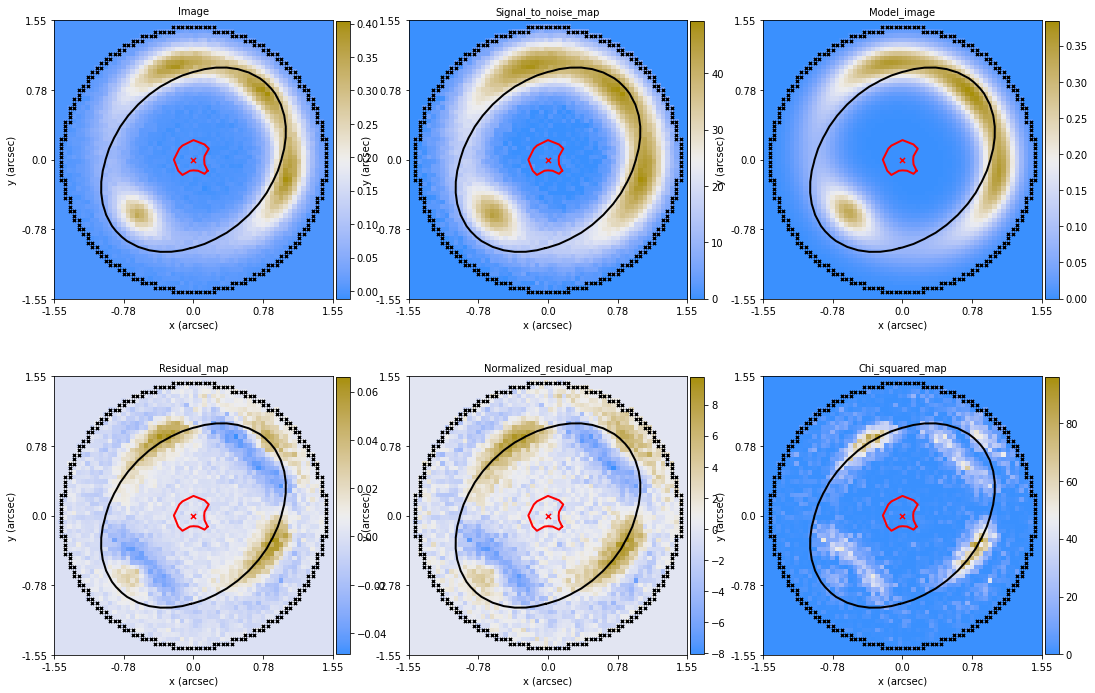


Radial Mass Distributions: (Dashed lines correspond to Einstein radii of each galaxy)



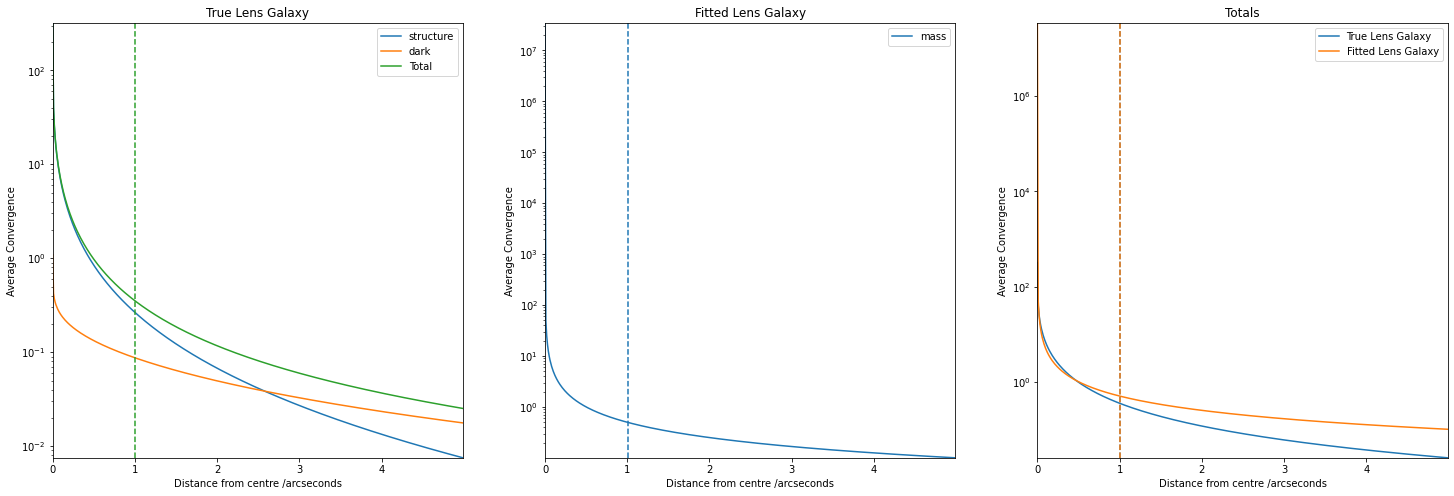


True Source Plane:



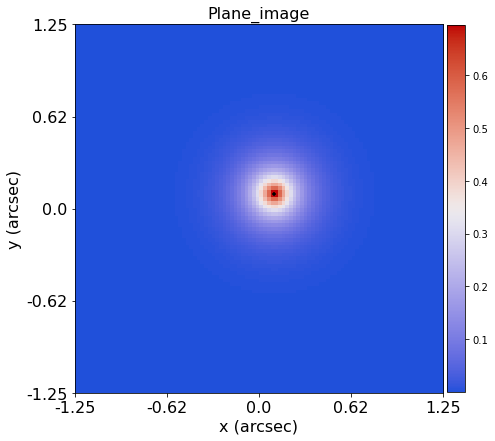


Fitted Source Plane:



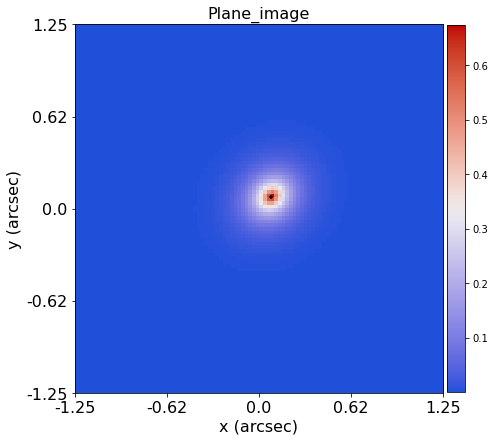


Phase:

Dataset name: (0.333, 0.0)_12.0_1.0_(0.1, 0.1)_(0.0, 0.0)_0.2

Phase directory:
/home/matthew/Durham2020/MyScripts/autolens_tools/ExampleData/NFW_sersic/(0.333, 0.0)_12.0_1.0_(0.1, 0.1)_(0.0, 0.0)_0.2/phase_2/settings__grid_sub_2/dynesty_static__nlive_50__bound_multi_vol_dec_0.5_vol_check_2.0__enlarge_1.0__sample_rwalk_walks_5_facc_0.2

Info:
{'dataset_name': '(0.333, 0.0)_12.0_1.0_(0.1, 0.1)_(0.0, 0.0)_0.2', 'pixel_scales': (0.05, 0.05)}


True Galaxies:

Redshift: 0.5
Mass Profiles:
EllipticalSersic
centre: (0.0, 0.0)
elliptical_comps: (0.333, 0.0)
axis_ratio: 0.5003750937734434
phi: 45.0
mass_to_light_ratio: 1.9300000000000004
intensity: 0.1
effective_radius: 1.2
sersic_index: 4.0
SphericalTruncatedNFWMCRLudlow
mass_at_200_input: 1000000000000.0
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
kappa_s: 0.03756161193884996
scale_radius: 3.787898765395369
inner_slope: 1.0
truncation_radius: 350.99838294346137
tau: 92.66308438600133

Redshift: 1.0
Light

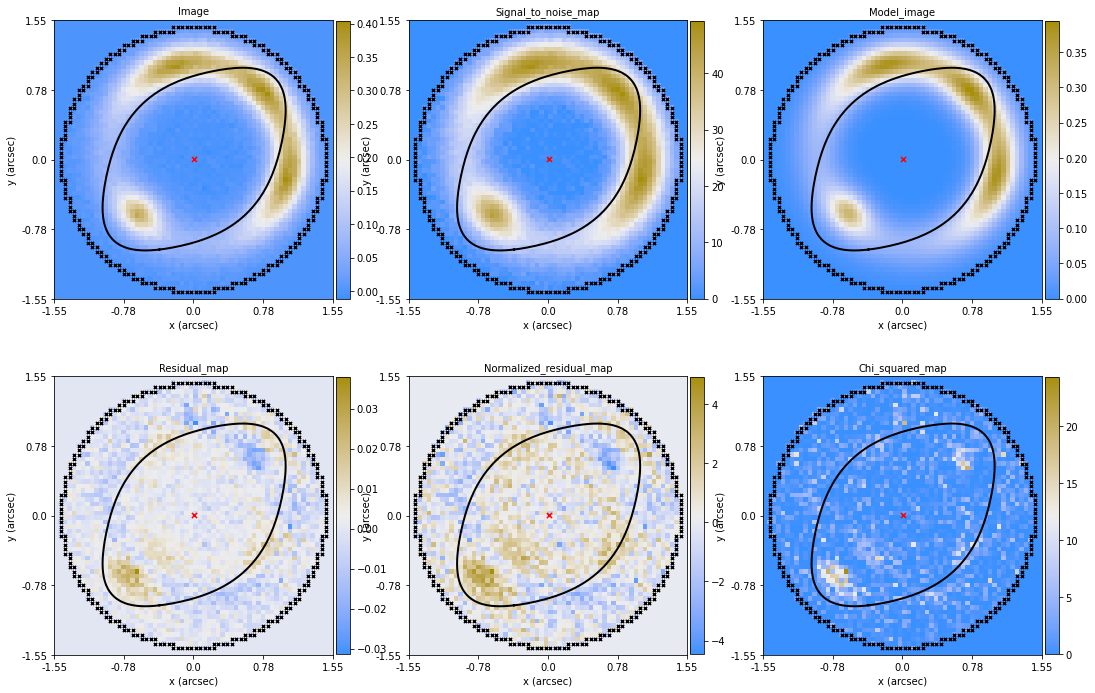


Radial Mass Distributions: (Dashed lines correspond to Einstein radii of each galaxy)



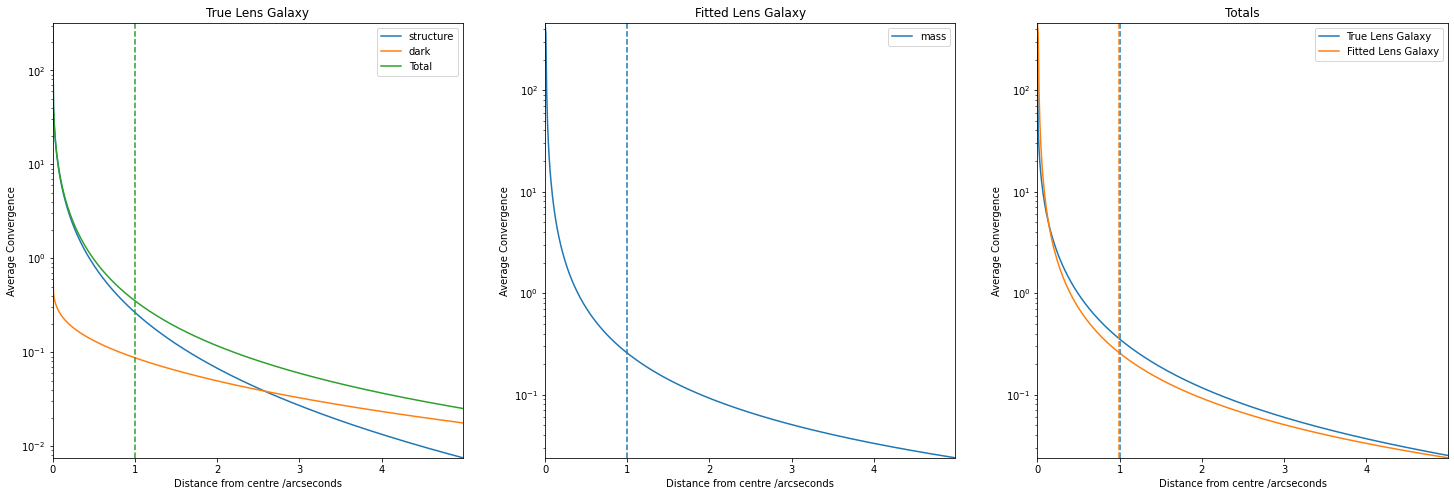


True Source Plane:



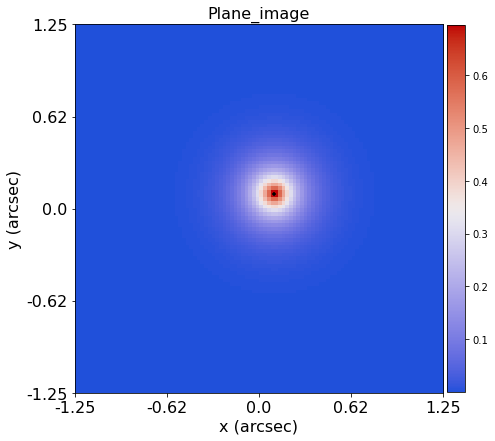


Fitted Source Plane:



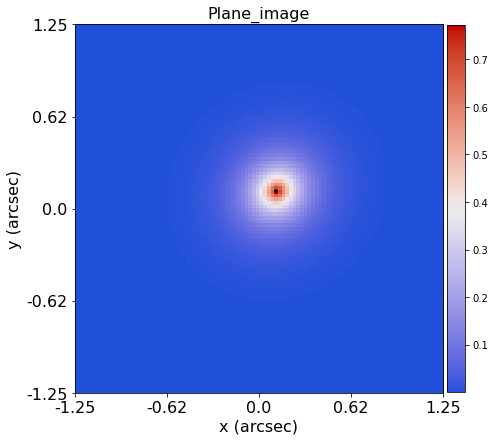


Phase:

Dataset name: (0.333, 0.0)_13.0_1.0_(0.1, 0.2)_(0.0, 0.2)_0.2

Phase directory:
/home/matthew/Durham2020/MyScripts/autolens_tools/ExampleData/NFW_sersic/(0.333, 0.0)_13.0_1.0_(0.1, 0.2)_(0.0, 0.2)_0.2/phase_1/settings__grid_sub_2/dynesty_static__nlive_50__bound_multi_vol_dec_0.5_vol_check_2.0__enlarge_1.0__sample_rwalk_walks_5_facc_0.2

Info:
{'dataset_name': '(0.333, 0.0)_13.0_1.0_(0.1, 0.2)_(0.0, 0.2)_0.2', 'pixel_scales': (0.05, 0.05)}


True Galaxies:

Redshift: 0.5
Mass Profiles:
EllipticalSersic
centre: (0.0, 0.0)
elliptical_comps: (0.333, 0.0)
axis_ratio: 0.5003750937734434
phi: 45.0
mass_to_light_ratio: 1.0
intensity: 0.15319337915690848
effective_radius: 1.2
sersic_index: 4.0
SphericalTruncatedNFWMCRLudlow
mass_at_200_input: 10000000000000.0
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
kappa_s: 0.060203510890504554
scale_radius: 10.160414276945334
inner_slope: 1.0
truncation_radius: 756.2030923584886
tau: 74.42640346608351

Redshift: 1.0
Li

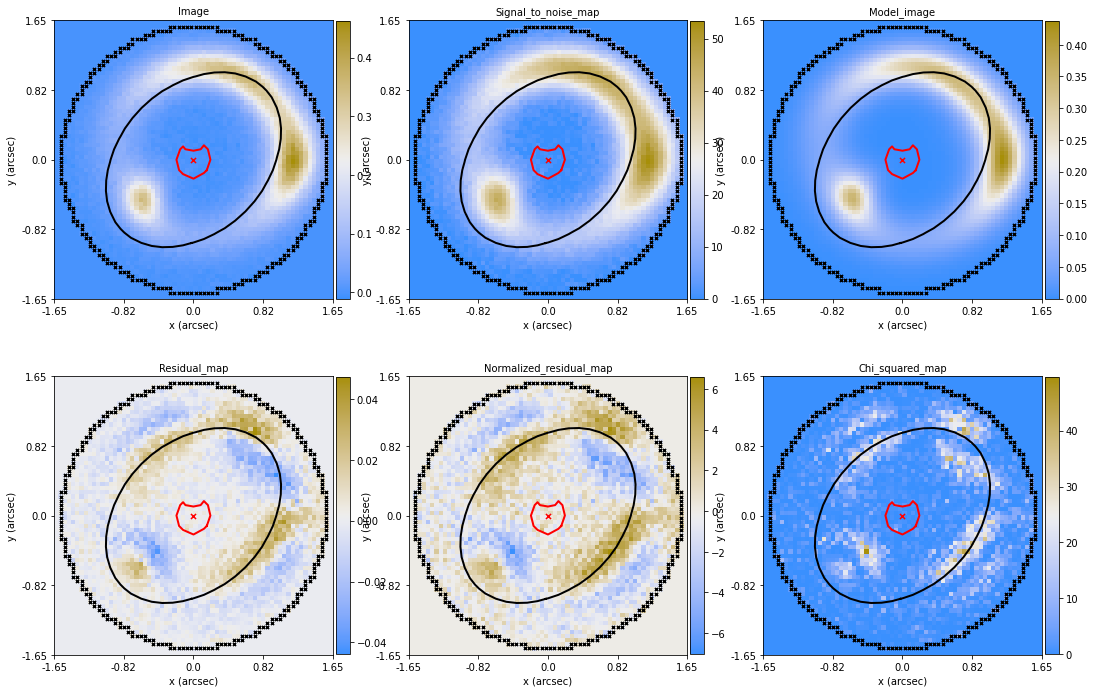


Radial Mass Distributions: (Dashed lines correspond to Einstein radii of each galaxy)



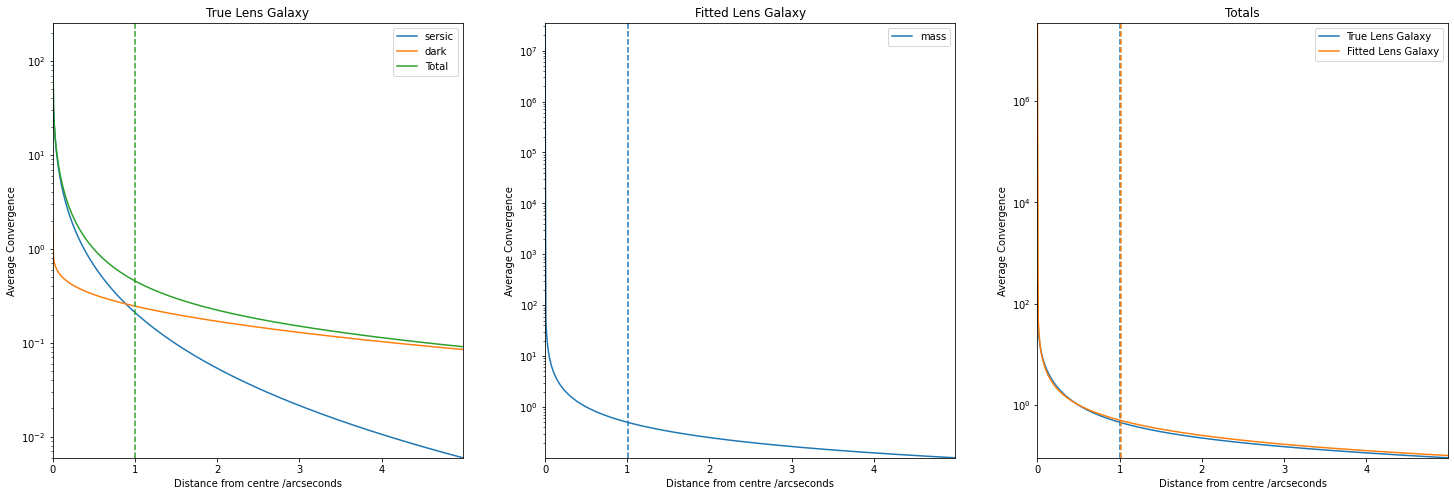


True Source Plane:



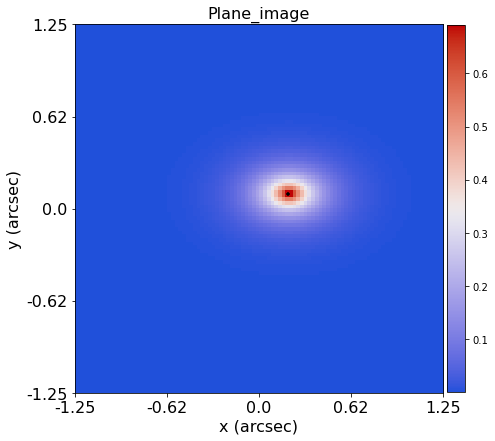


Fitted Source Plane:



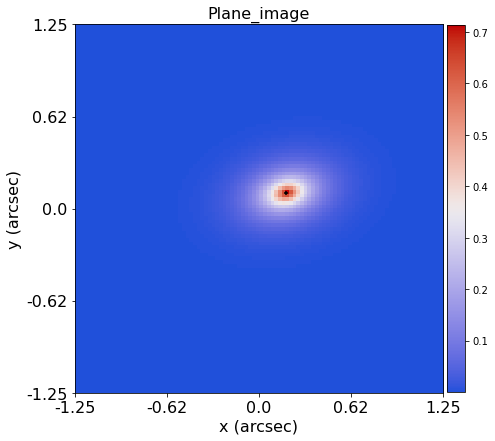


Phase:

Dataset name: (0.333, 0.0)_13.0_1.0_(0.1, 0.2)_(0.0, 0.2)_0.2

Phase directory:
/home/matthew/Durham2020/MyScripts/autolens_tools/ExampleData/NFW_sersic/(0.333, 0.0)_13.0_1.0_(0.1, 0.2)_(0.0, 0.2)_0.2/phase_2/settings__grid_sub_2/dynesty_static__nlive_50__bound_multi_vol_dec_0.5_vol_check_2.0__enlarge_1.0__sample_rwalk_walks_5_facc_0.2

Info:
{'dataset_name': '(0.333, 0.0)_13.0_1.0_(0.1, 0.2)_(0.0, 0.2)_0.2', 'pixel_scales': (0.05, 0.05)}


True Galaxies:

Redshift: 0.5
Mass Profiles:
EllipticalSersic
centre: (0.0, 0.0)
elliptical_comps: (0.333, 0.0)
axis_ratio: 0.5003750937734434
phi: 45.0
mass_to_light_ratio: 1.0
intensity: 0.15319337915690848
effective_radius: 1.2
sersic_index: 4.0
SphericalTruncatedNFWMCRLudlow
mass_at_200_input: 10000000000000.0
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
kappa_s: 0.060203510890504554
scale_radius: 10.160414276945334
inner_slope: 1.0
truncation_radius: 756.2030923584886
tau: 74.42640346608351

Redshift: 1.0
Li

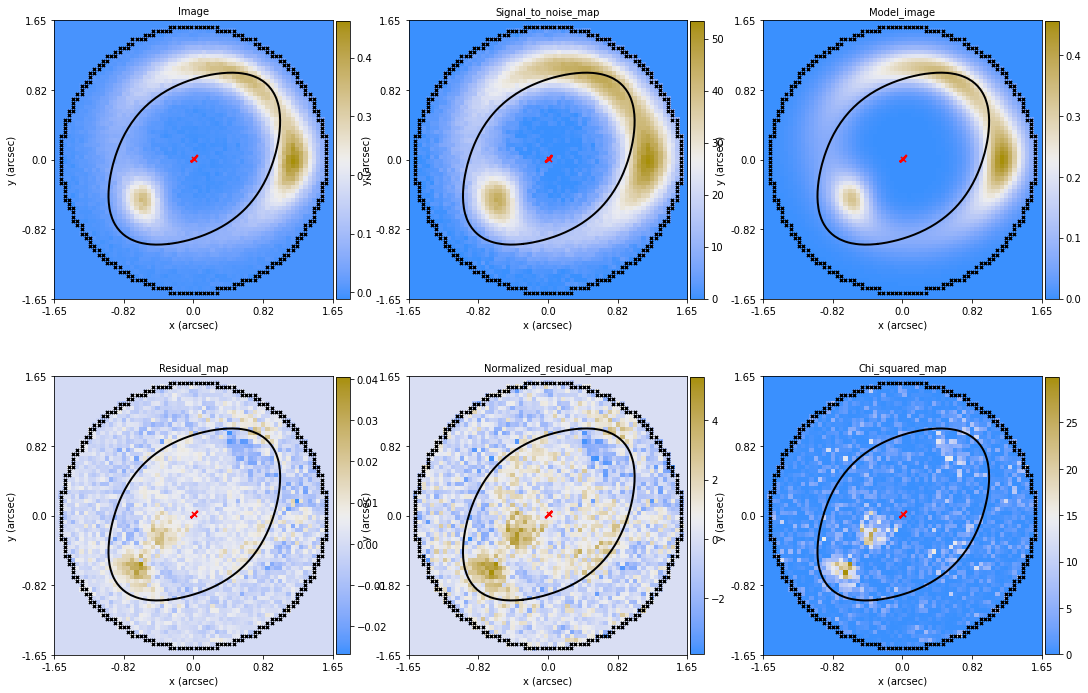


Radial Mass Distributions: (Dashed lines correspond to Einstein radii of each galaxy)



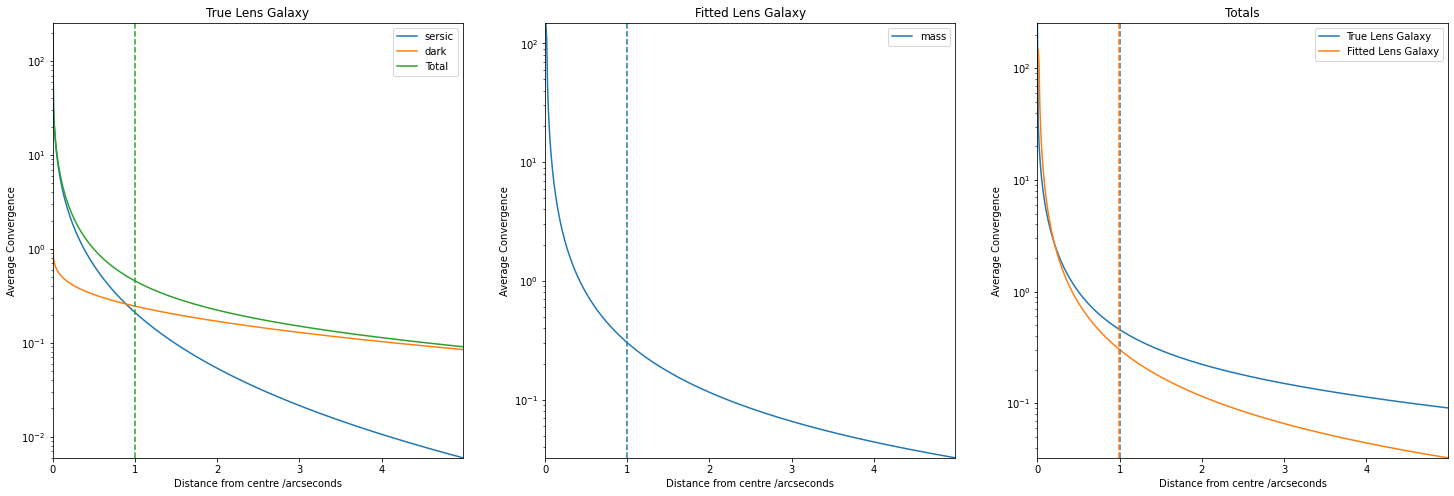


True Source Plane:



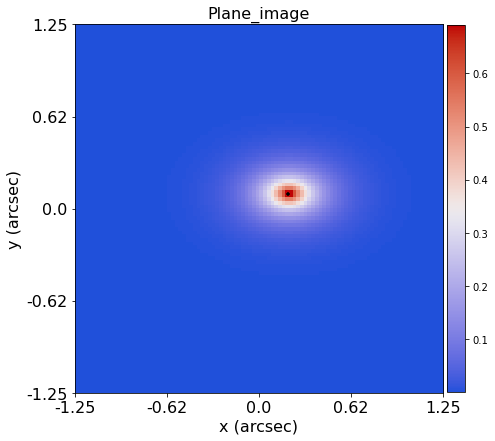


Fitted Source Plane:



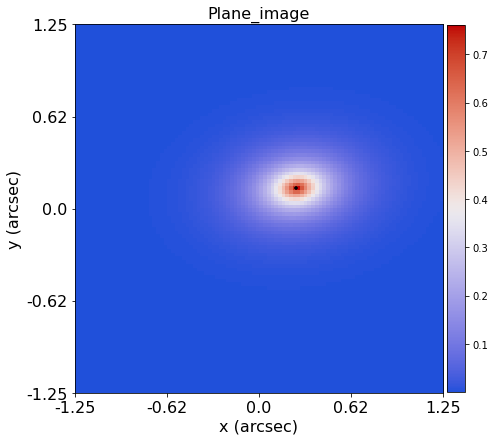


Phase:

Dataset name: (0.333, 0.0)_13.0_1.0_(0.1, 0.2)_(0.0, 0.0)_0.2

Phase directory:
/home/matthew/Durham2020/MyScripts/autolens_tools/ExampleData/NFW_sersic/(0.333, 0.0)_13.0_1.0_(0.1, 0.2)_(0.0, 0.0)_0.2/phase_1/settings__grid_sub_2/dynesty_static__nlive_50__bound_multi_vol_dec_0.5_vol_check_2.0__enlarge_1.0__sample_rwalk_walks_5_facc_0.2

Info:
{'dataset_name': '(0.333, 0.0)_13.0_1.0_(0.1, 0.2)_(0.0, 0.0)_0.2', 'pixel_scales': (0.05, 0.05)}


True Galaxies:

Redshift: 0.5
Mass Profiles:
EllipticalSersic
centre: (0.0, 0.0)
elliptical_comps: (0.333, 0.0)
axis_ratio: 0.5003750937734434
phi: 45.0
mass_to_light_ratio: 1.54
intensity: 0.1
effective_radius: 1.2
sersic_index: 4.0
SphericalTruncatedNFWMCRLudlow
mass_at_200_input: 10000000000000.0
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
kappa_s: 0.060203510890504554
scale_radius: 10.160414276945334
inner_slope: 1.0
truncation_radius: 756.2030923584886
tau: 74.42640346608351

Redshift: 1.0
Light Profiles:
E

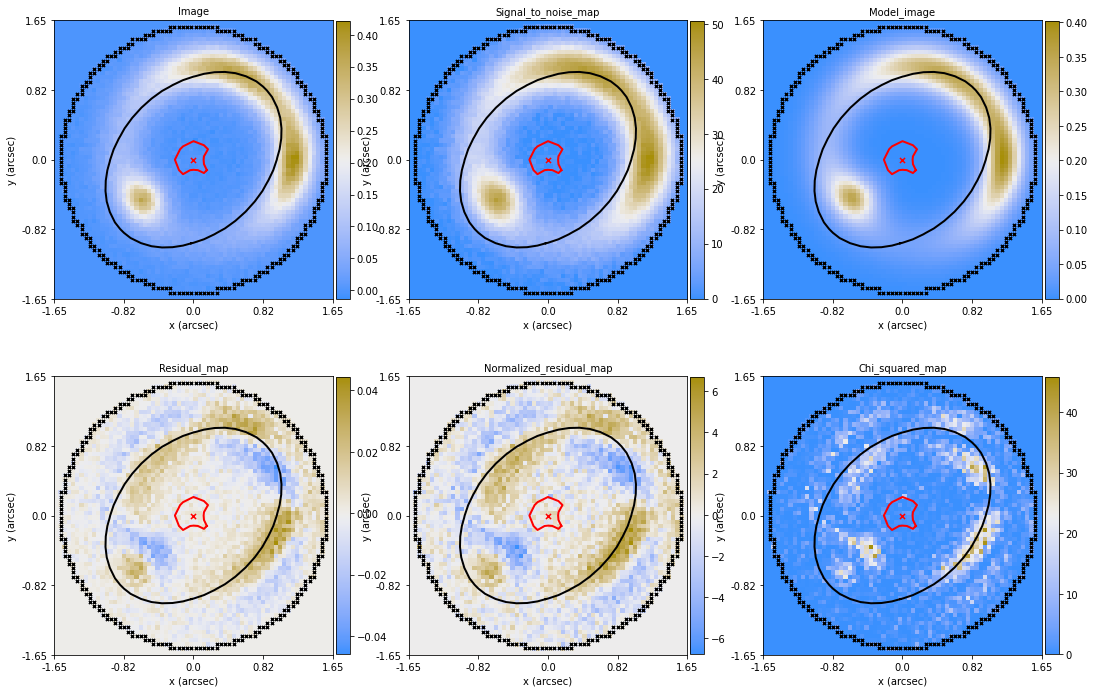


Radial Mass Distributions: (Dashed lines correspond to Einstein radii of each galaxy)



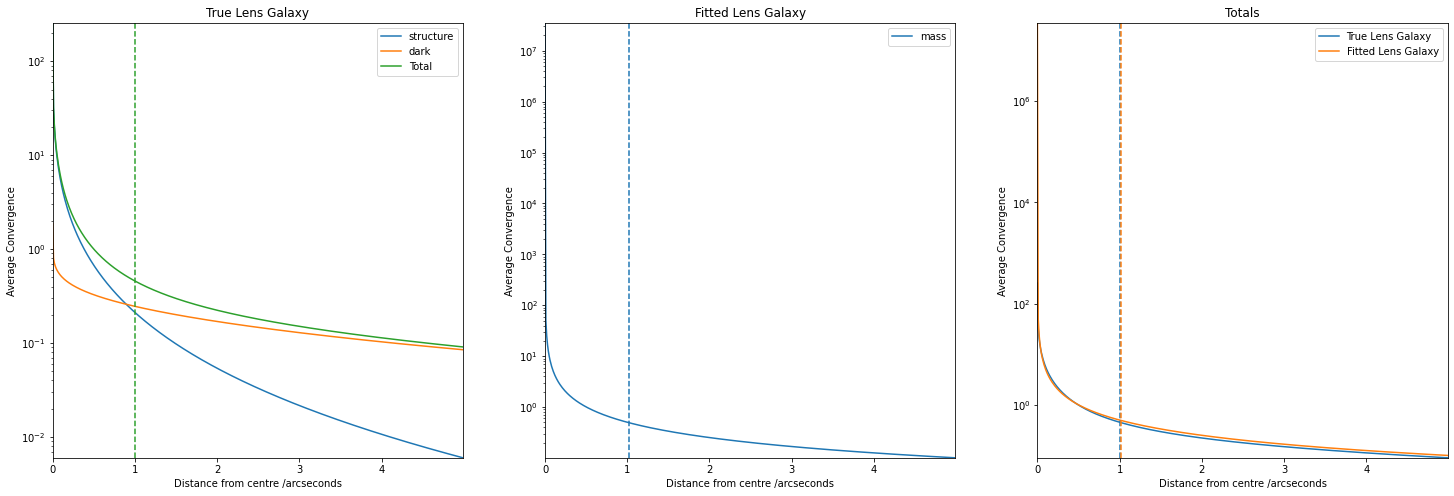


True Source Plane:



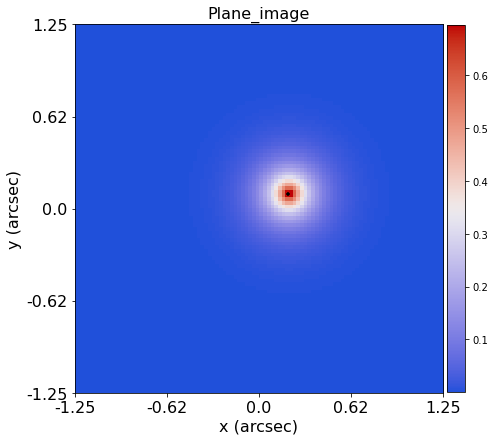


Fitted Source Plane:



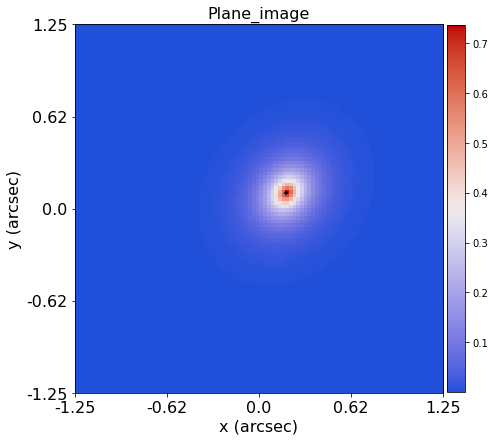


Phase:

Dataset name: (0.333, 0.0)_13.0_1.0_(0.1, 0.2)_(0.0, 0.0)_0.2

Phase directory:
/home/matthew/Durham2020/MyScripts/autolens_tools/ExampleData/NFW_sersic/(0.333, 0.0)_13.0_1.0_(0.1, 0.2)_(0.0, 0.0)_0.2/phase_2/settings__grid_sub_2/dynesty_static__nlive_50__bound_multi_vol_dec_0.5_vol_check_2.0__enlarge_1.0__sample_rwalk_walks_5_facc_0.2

Info:
{'dataset_name': '(0.333, 0.0)_13.0_1.0_(0.1, 0.2)_(0.0, 0.0)_0.2', 'pixel_scales': (0.05, 0.05)}


True Galaxies:

Redshift: 0.5
Mass Profiles:
EllipticalSersic
centre: (0.0, 0.0)
elliptical_comps: (0.333, 0.0)
axis_ratio: 0.5003750937734434
phi: 45.0
mass_to_light_ratio: 1.54
intensity: 0.1
effective_radius: 1.2
sersic_index: 4.0
SphericalTruncatedNFWMCRLudlow
mass_at_200_input: 10000000000000.0
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
kappa_s: 0.060203510890504554
scale_radius: 10.160414276945334
inner_slope: 1.0
truncation_radius: 756.2030923584886
tau: 74.42640346608351

Redshift: 1.0
Light Profiles:
E

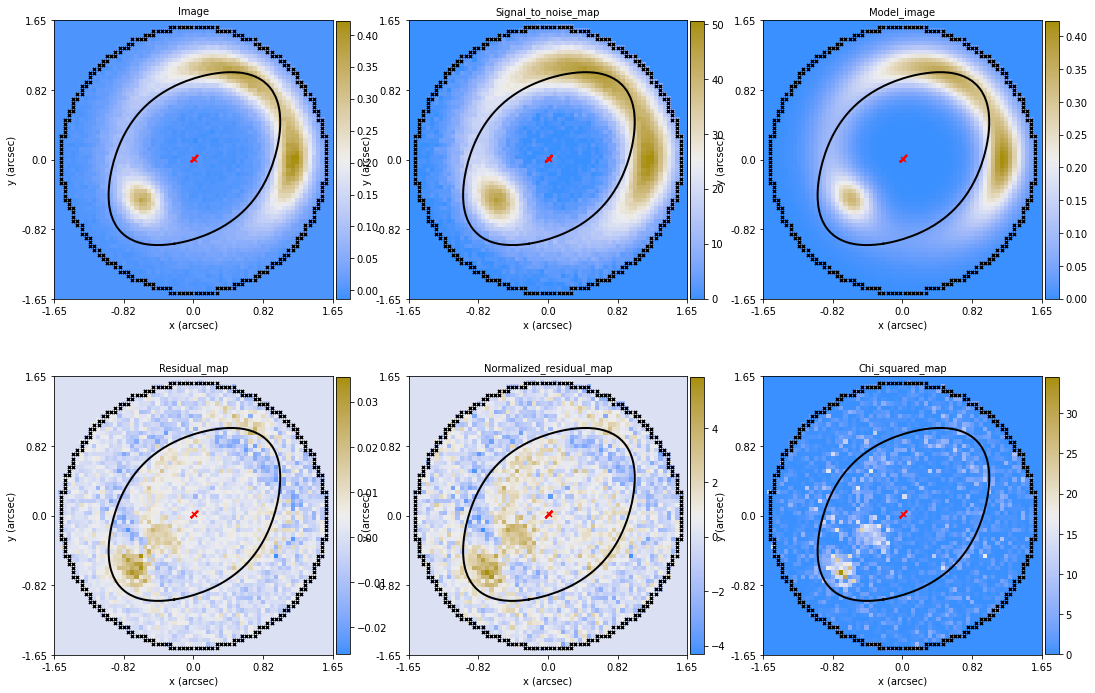


Radial Mass Distributions: (Dashed lines correspond to Einstein radii of each galaxy)



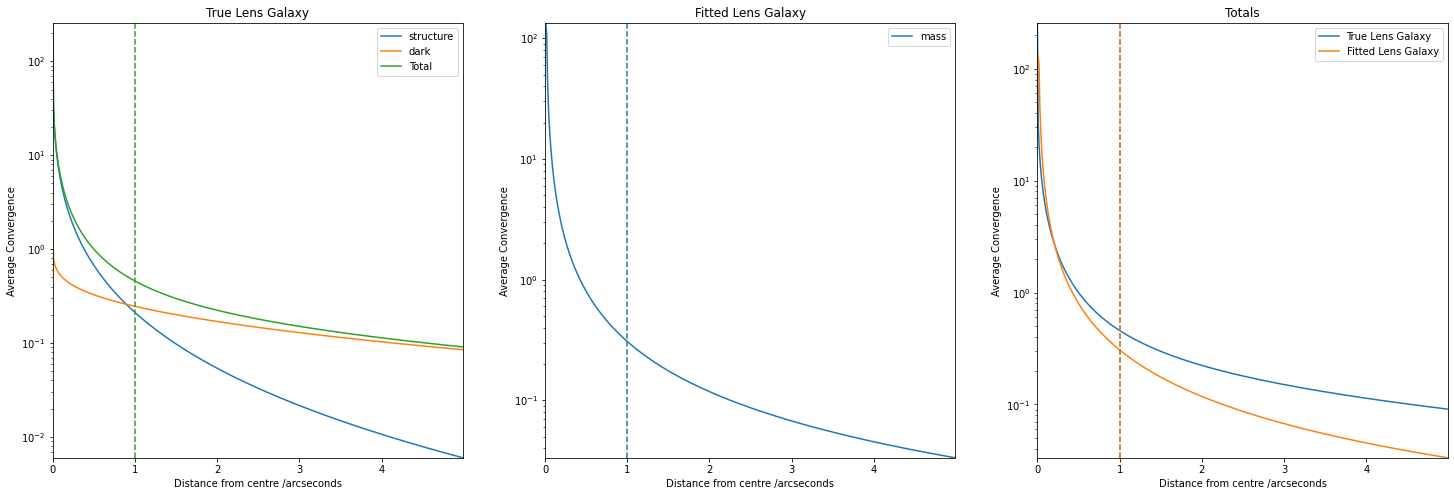


True Source Plane:



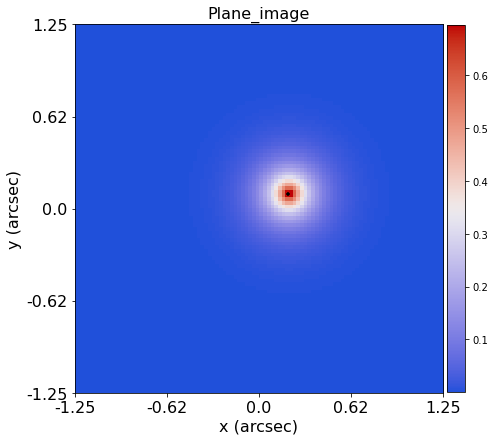


Fitted Source Plane:



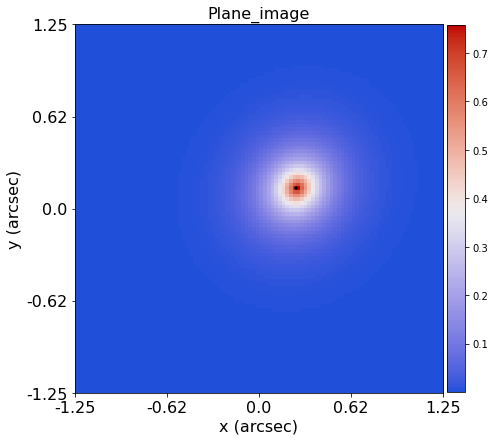


Phase:

Dataset name: (0.0, 0.0)_13.0_1.0_(0.1, 0.0)_(0.0, 0.0)_0.2

Phase directory:
/home/matthew/Durham2020/MyScripts/autolens_tools/ExampleData/NFW_sersic/(0.0, 0.0)_13.0_1.0_(0.1, 0.0)_(0.0, 0.0)_0.2/phase_1/settings__grid_sub_2/dynesty_static__nlive_50__bound_multi_vol_dec_0.5_vol_check_2.0__enlarge_1.0__sample_rwalk_walks_5_facc_0.2

Info:
{'dataset_name': '(0.0, 0.0)_13.0_1.0_(0.1, 0.0)_(0.0, 0.0)_0.2', 'pixel_scales': (0.05, 0.05)}


True Galaxies:

Redshift: 0.5
Mass Profiles:
EllipticalSersic
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
mass_to_light_ratio: 1.49
intensity: 0.1
effective_radius: 1.2
sersic_index: 4.0
SphericalTruncatedNFWMCRLudlow
mass_at_200_input: 10000000000000.0
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
kappa_s: 0.060203510890504554
scale_radius: 10.160414276945334
inner_slope: 1.0
truncation_radius: 756.2030923584886
tau: 74.42640346608351

Redshift: 1.0
Light Profiles:
EllipticalExponential
cen

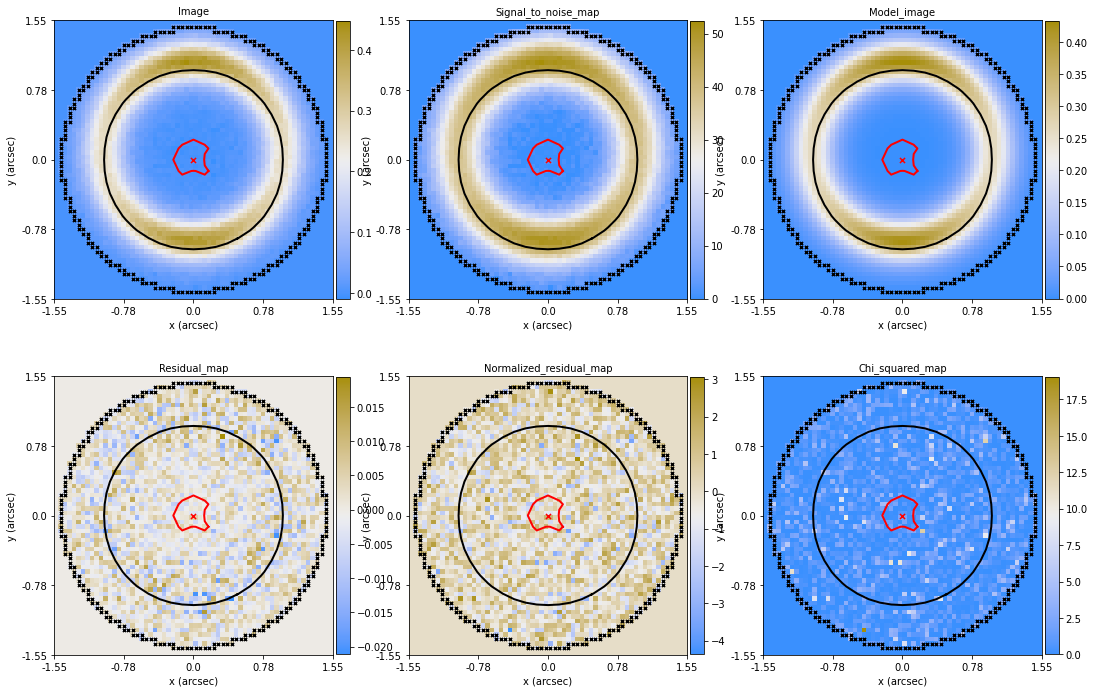


Radial Mass Distributions: (Dashed lines correspond to Einstein radii of each galaxy)



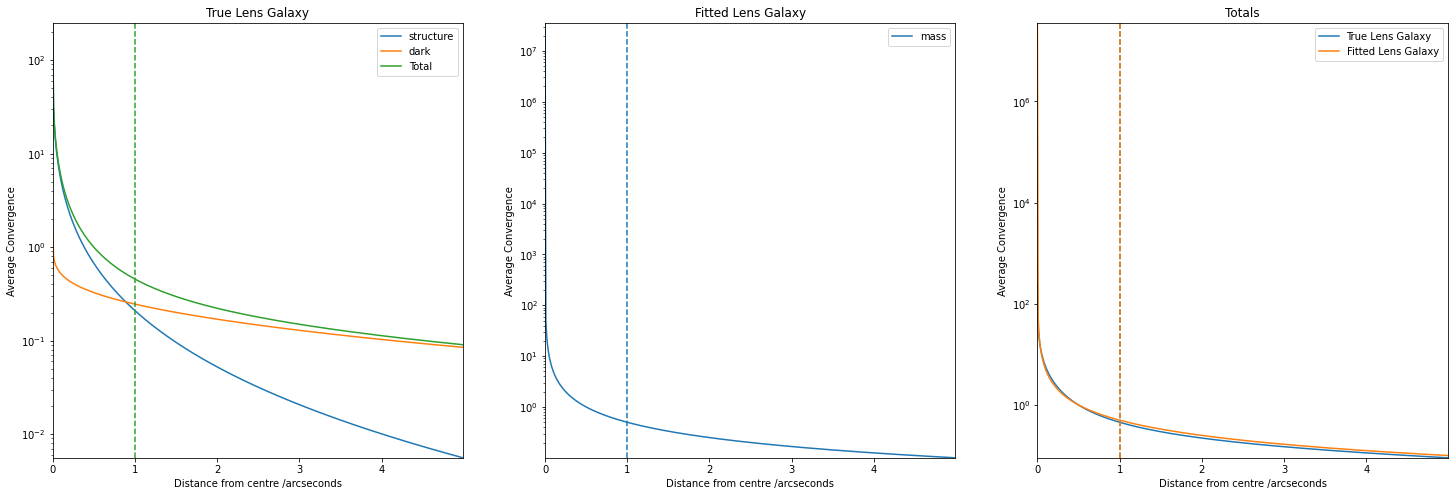


True Source Plane:



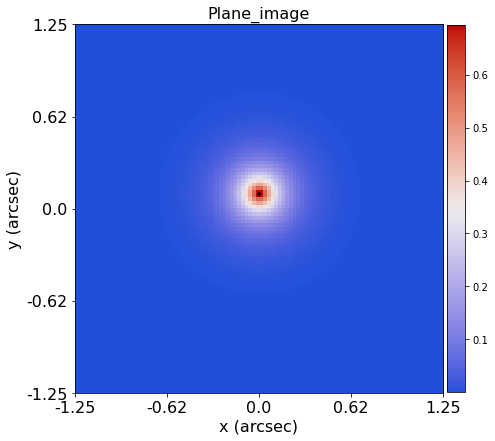


Fitted Source Plane:



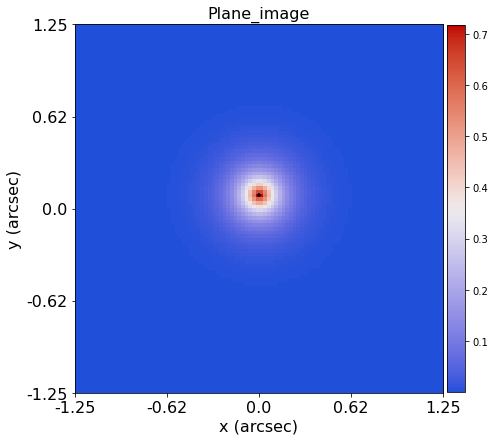


Phase:

Dataset name: (0.0, 0.0)_13.0_1.0_(0.1, 0.0)_(0.0, 0.0)_0.2

Phase directory:
/home/matthew/Durham2020/MyScripts/autolens_tools/ExampleData/NFW_sersic/(0.0, 0.0)_13.0_1.0_(0.1, 0.0)_(0.0, 0.0)_0.2/phase_2/settings__grid_sub_2/dynesty_static__nlive_50__bound_multi_vol_dec_0.5_vol_check_2.0__enlarge_1.0__sample_rwalk_walks_5_facc_0.2

Info:
{'dataset_name': '(0.0, 0.0)_13.0_1.0_(0.1, 0.0)_(0.0, 0.0)_0.2', 'pixel_scales': (0.05, 0.05)}


True Galaxies:

Redshift: 0.5
Mass Profiles:
EllipticalSersic
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
mass_to_light_ratio: 1.49
intensity: 0.1
effective_radius: 1.2
sersic_index: 4.0
SphericalTruncatedNFWMCRLudlow
mass_at_200_input: 10000000000000.0
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
kappa_s: 0.060203510890504554
scale_radius: 10.160414276945334
inner_slope: 1.0
truncation_radius: 756.2030923584886
tau: 74.42640346608351

Redshift: 1.0
Light Profiles:
EllipticalExponential
cen

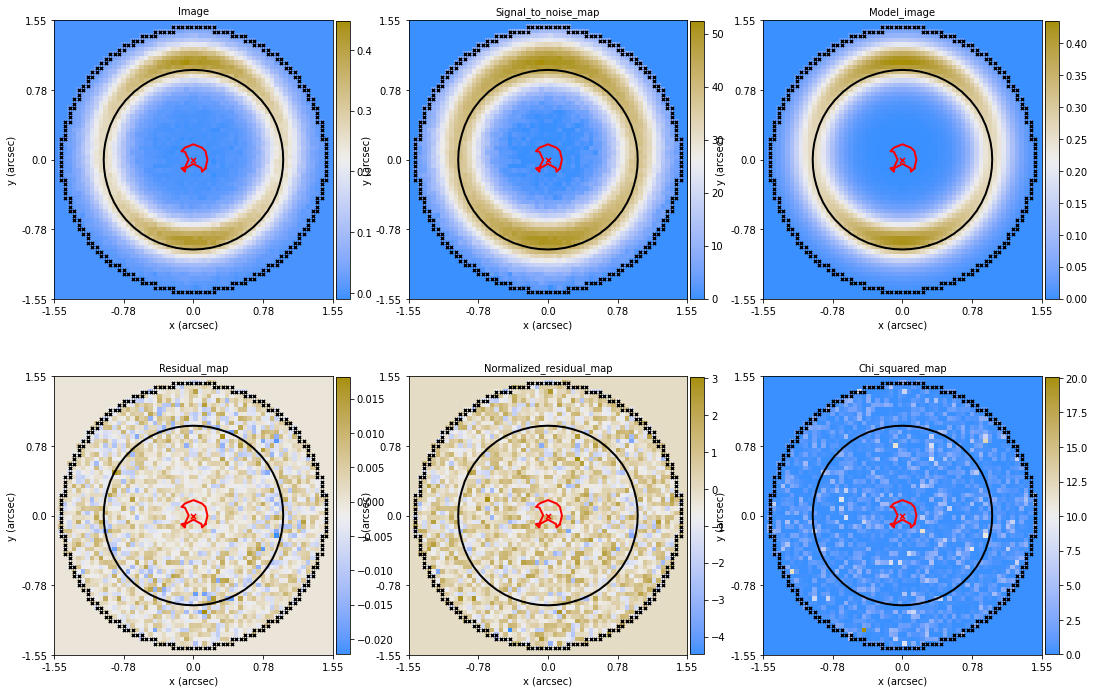


Radial Mass Distributions: (Dashed lines correspond to Einstein radii of each galaxy)



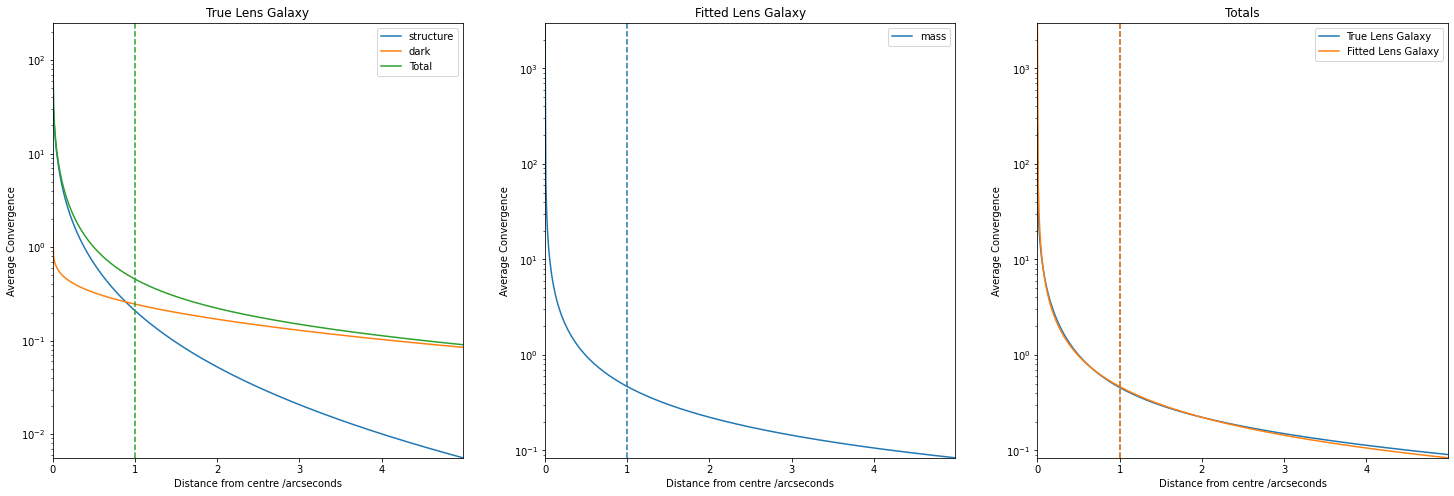


True Source Plane:



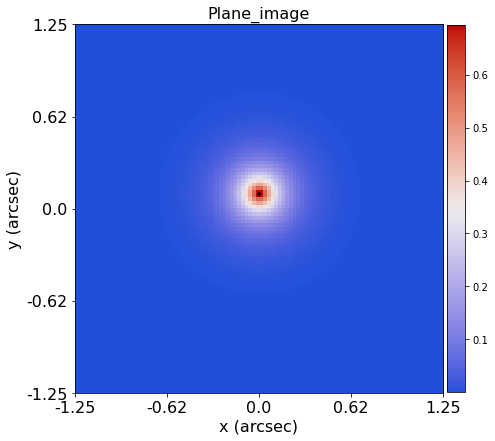


Fitted Source Plane:



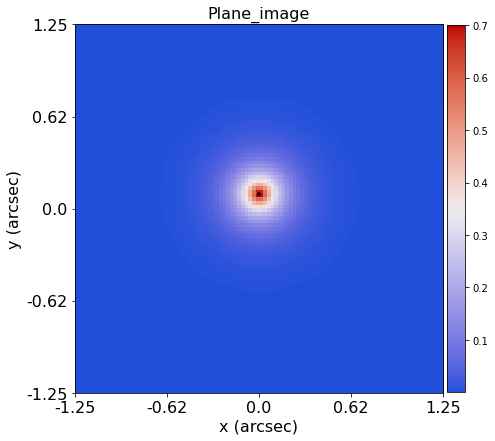

In [5]:
for phase in agg:
    output = phase.samples
    dataset = phase.dataset
    mask = phase.mask
    masked_imaging = al.MaskedImaging(imaging=dataset, mask=mask)
    fitted_tracer = al.Tracer.from_galaxies(
        galaxies=output.max_log_likelihood_instance.galaxies
    )
    true_tracer = phase.true_tracer

    print("\nPhase:")
    if dataset.name != None:
        print(f"\nDataset name: {dataset.name}")
    print(f"\nPhase directory:")
    print(f"{phase.directory}")
    if phase.info != None:
        print("\nInfo:")
        print(f"{phase.info}")

    print("\n\nTrue Galaxies:")
    for galaxy in true_tracer.galaxies:
        print(f"\n{galaxy}")

    print("\n\nFitted Galaxies:")

    for galaxy in fitted_tracer.galaxies:
        print(f"\n{galaxy}")

    print("\n\nFit Imaging:")
    aplt.FitImaging.subplot_fit_imaging(
        fit=al.FitImaging(masked_imaging=masked_imaging, tracer=fitted_tracer)
    )

    print(
        "\nRadial Mass Distributions: (Dashed lines correspond to Einstein radii of each galaxy)\n"
    )
    radial_mass_graph(
        {
            "True Lens Galaxy": true_tracer.galaxies[0],
            "Fitted Lens Galaxy": fitted_tracer.galaxies[0],
        }
    )

    print("\nTrue Source Plane:\n")
    aplt.Plane.plane_image(
        plane=true_tracer.planes[-1],
        grid=al.Grid.uniform(shape_2d=(100, 100), pixel_scales=0.025),
    )

    print("\nFitted Source Plane:\n")
    aplt.Plane.plane_image(
        plane=fitted_tracer.planes[-1],
        grid=al.Grid.uniform(shape_2d=(100, 100), pixel_scales=0.025),
    )